<a href="https://colab.research.google.com/github/PravinMuraliDharan/Data_Science_Capstone_Project/blob/Master/Team_Colab_notebook_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Introduction

---


Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Problem Statement 

---


Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

## <b> Importing Necessary Libraries.

---











In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory = '/content/drive/MyDrive/Almabetter DataScience/Projects/Data/Copy of Telecom Churn.csv'

In [ ]:
df = pd.read_csv(working_directory)

In [ ]:
churn_telecom= df.copy()

In [ ]:
churn_telecom_copy= churn_telecom.copy()

## <b> Basic understaning of the Data Frame

---



In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.shape

(3333, 20)

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## <b> Primordial Churn rate Analysis

---



In [ ]:
dep_var_df = df.loc[:,['State','Total day minutes','Total day calls','Total day charge','Total eve calls','Total eve minutes','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Churn']]
dep_var_df['Modifi_Churn'] = dep_var_df['Churn'].astype(int)
dep_var_df['Total_calls'] = dep_var_df['Total day calls'] + dep_var_df['Total eve calls'] + dep_var_df['Total night calls'] + dep_var_df['Total intl calls']
dep_var_df['Total_minutes'] = dep_var_df['Total day minutes'] + dep_var_df['Total eve minutes'] + dep_var_df['Total intl minutes'] + dep_var_df['Total night minutes']
dep_var_df['Total_charges'] = dep_var_df['Total day charge'] + dep_var_df['Total eve charge'] + dep_var_df['Total intl charge'] + dep_var_df['Total night charge']

In [ ]:
dep_var_df.head()

,State,Total day minutes,Total day calls,Total day charge,Total eve calls,Total eve minutes,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Churn,Modifi_Churn,Total_calls,Total_minutes,Total_charges
0,KS,265.1,110,45.07,99,197.4,16.78,244.7,91,11.01,10.0,3,2.70,False,0,303,717.2,75.56
1,OH,161.6,123,27.47,103,195.5,16.62,254.4,103,11.45,13.7,3,3.70,False,0,332,625.2,59.24
2,NJ,243.4,114,41.38,110,121.2,10.30,162.6,104,7.32,12.2,5,3.29,False,0,333,539.4,62.29
3,OH,299.4,71,50.90,88,61.9,5.26,196.9,89,8.86,6.6,7,1.78,False,0,255,564.8,66.80
4,OK,166.7,113,28.34,122,148.3,12.61,186.9,121,8.41,10.1,3,2.73,False,0,359,512.0,52.09


Maximum non churn customer belongs to these particular state

In [ ]:
def_var_df = dep_var_df.loc[:,['State','Modifi_Churn']]
state_churn_rate_df = def_var_df.value_counts().reset_index()
state_churn_rate_df.head()

,State,Modifi_Churn,0
0,WV,0,96
1,VA,0,72
2,AL,0,72
3,WI,0,71
4,MN,0,69


All the state that has lower churn rate

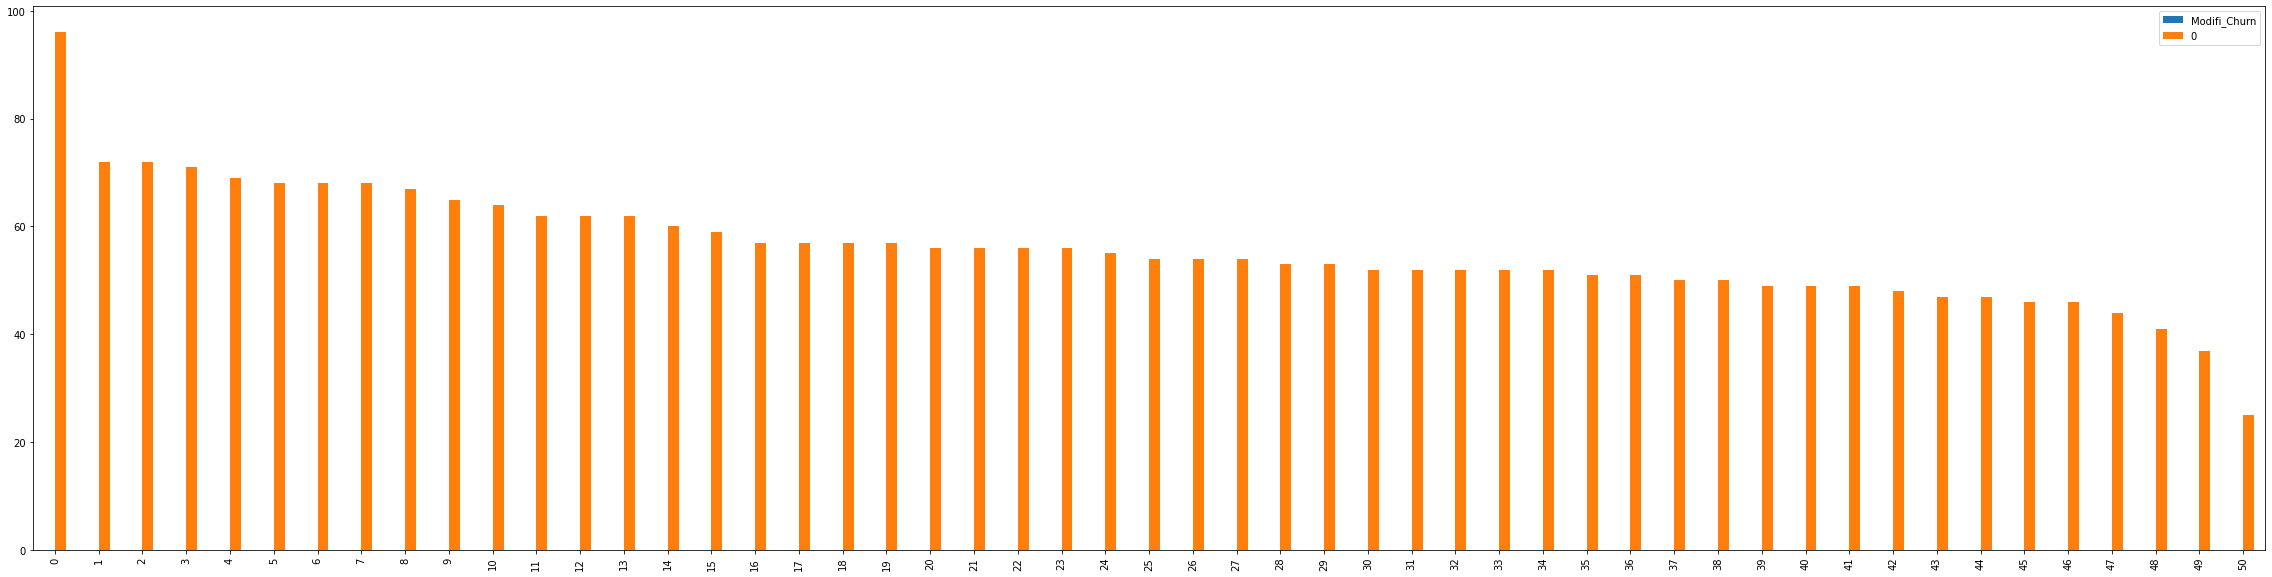

In [ ]:
stat_true_df = state_churn_rate_df[state_churn_rate_df['Modifi_Churn']==0][0:]
stat_true_df.sort_values(ascending=False, by=[0])
a = stat_true_df.head(60)
a.plot(kind='bar')
plt.rcParams['figure.figsize'] = (40,10)

Number of customer got churn per state wise.

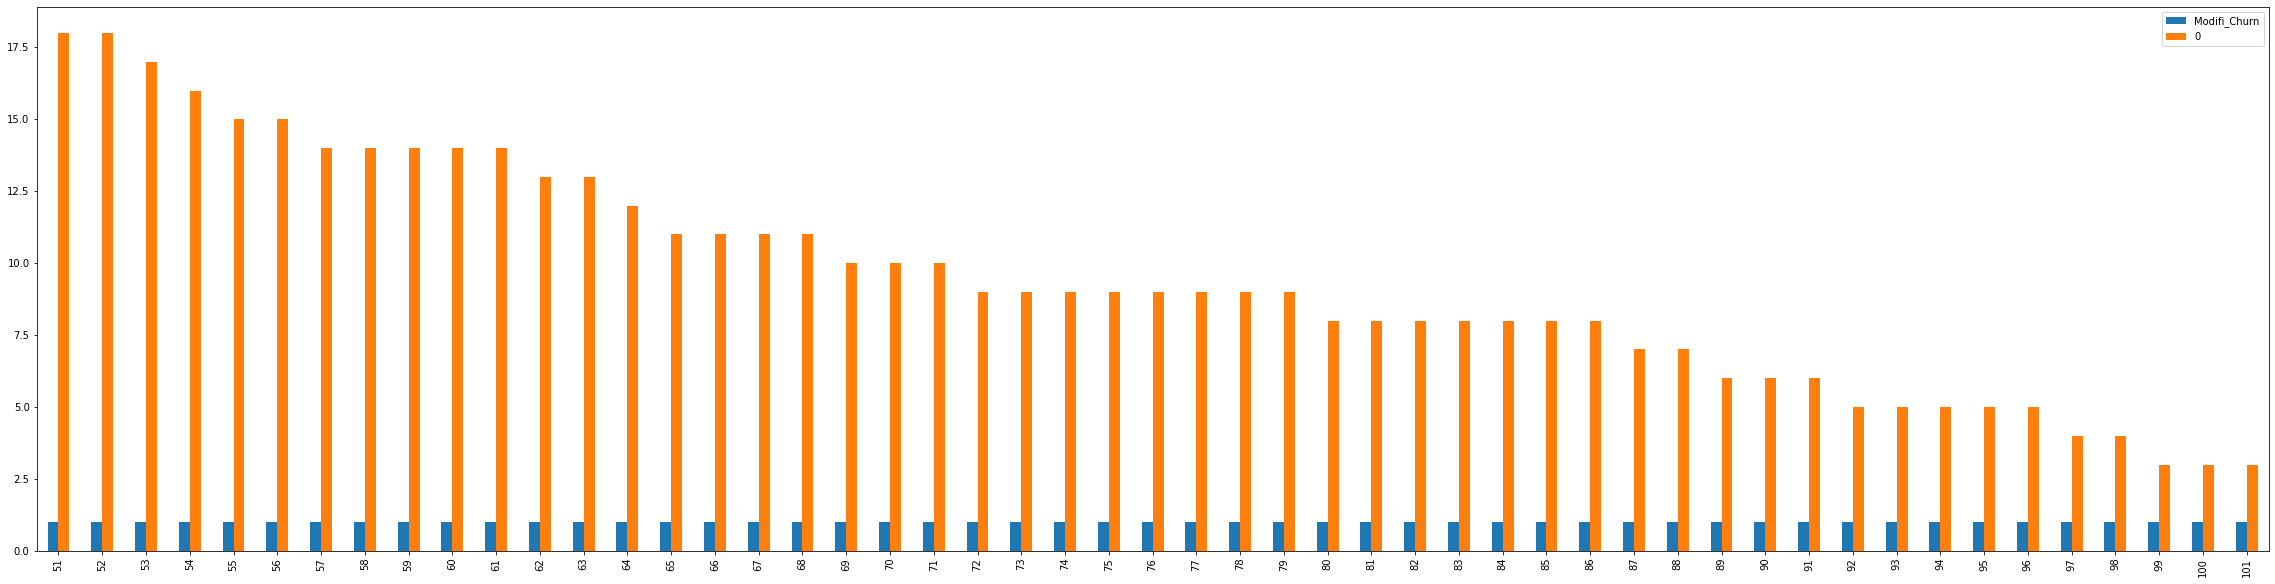

In [ ]:
stat_false_df = state_churn_rate_df[state_churn_rate_df['Modifi_Churn']==1][0:]
stat_false_df.sort_values(ascending=False, by=[0])
b = stat_false_df.head(60)
b.plot(kind='bar')
plt.rcParams['figure.figsize'] = (40,10)

## <b> Finding out which factor has greater impact on "Charge"

---



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d7d7f1f50>,
      dtype=object)

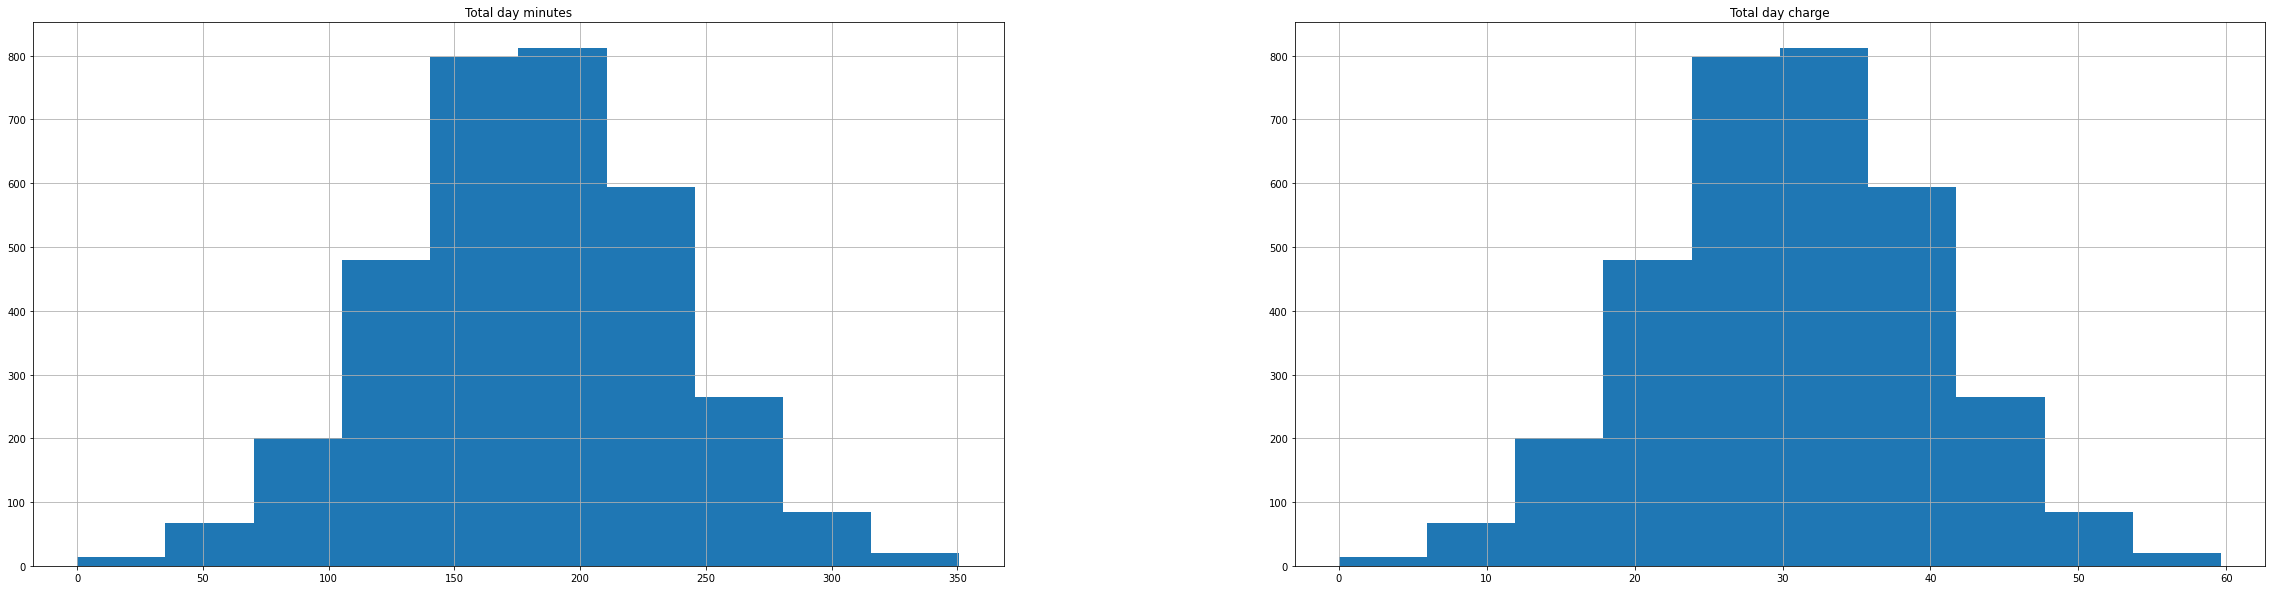

In [ ]:
daycallhis_df = dep_var_df[['Total day minutes','Total day charge']][0:]
daycallhis_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d7d07d050>,
      dtype=object)

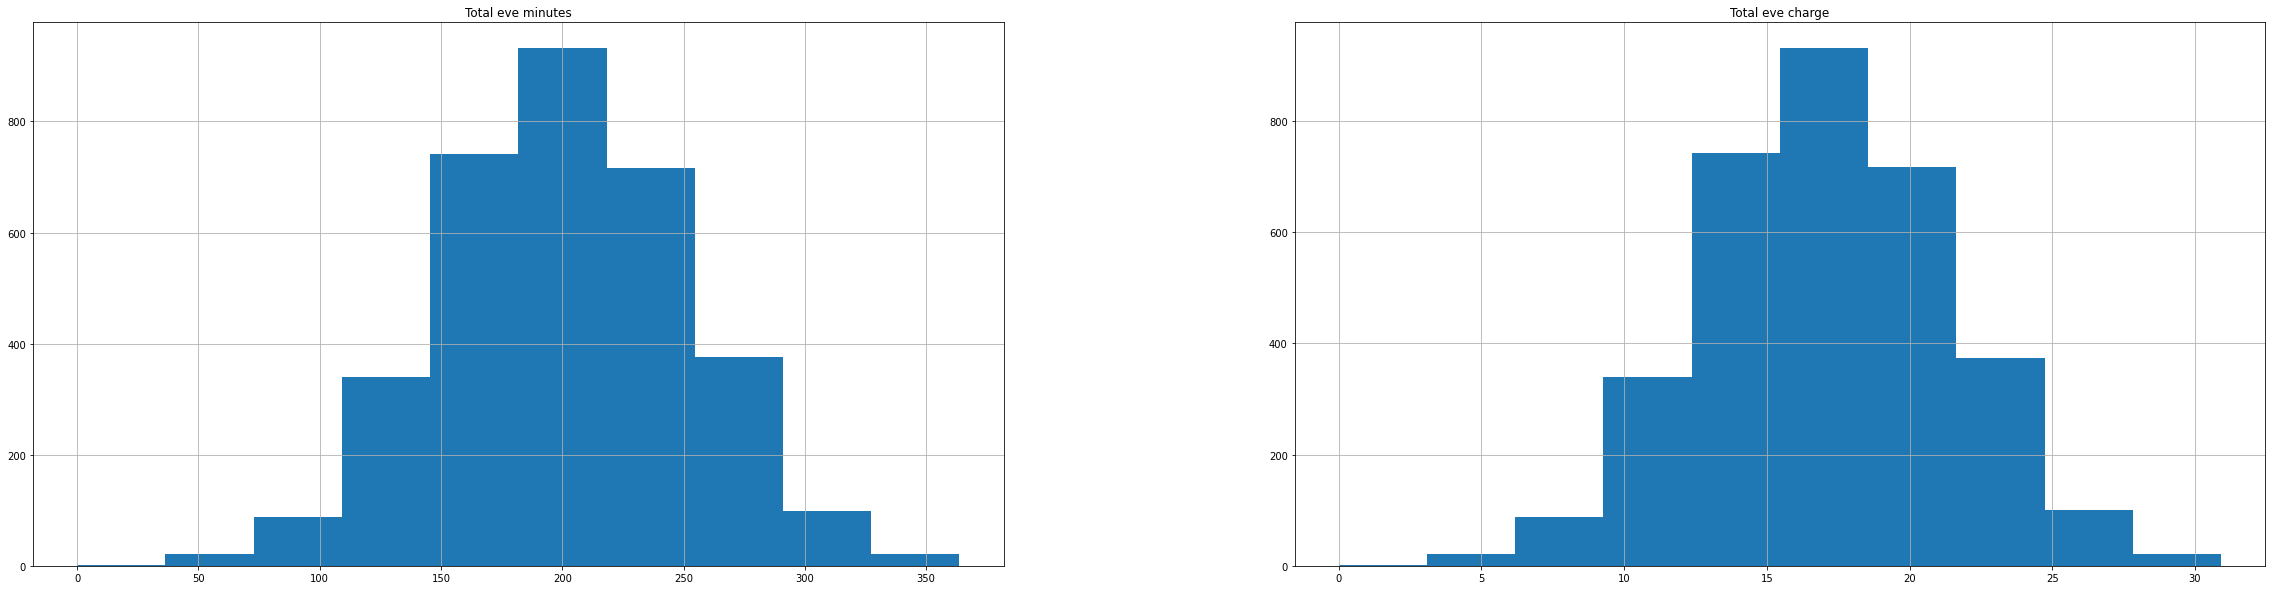

In [ ]:
evecallhis_df = dep_var_df[['Total eve minutes','Total eve charge']][0:]
evecallhis_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d7cf06790>,
      dtype=object)

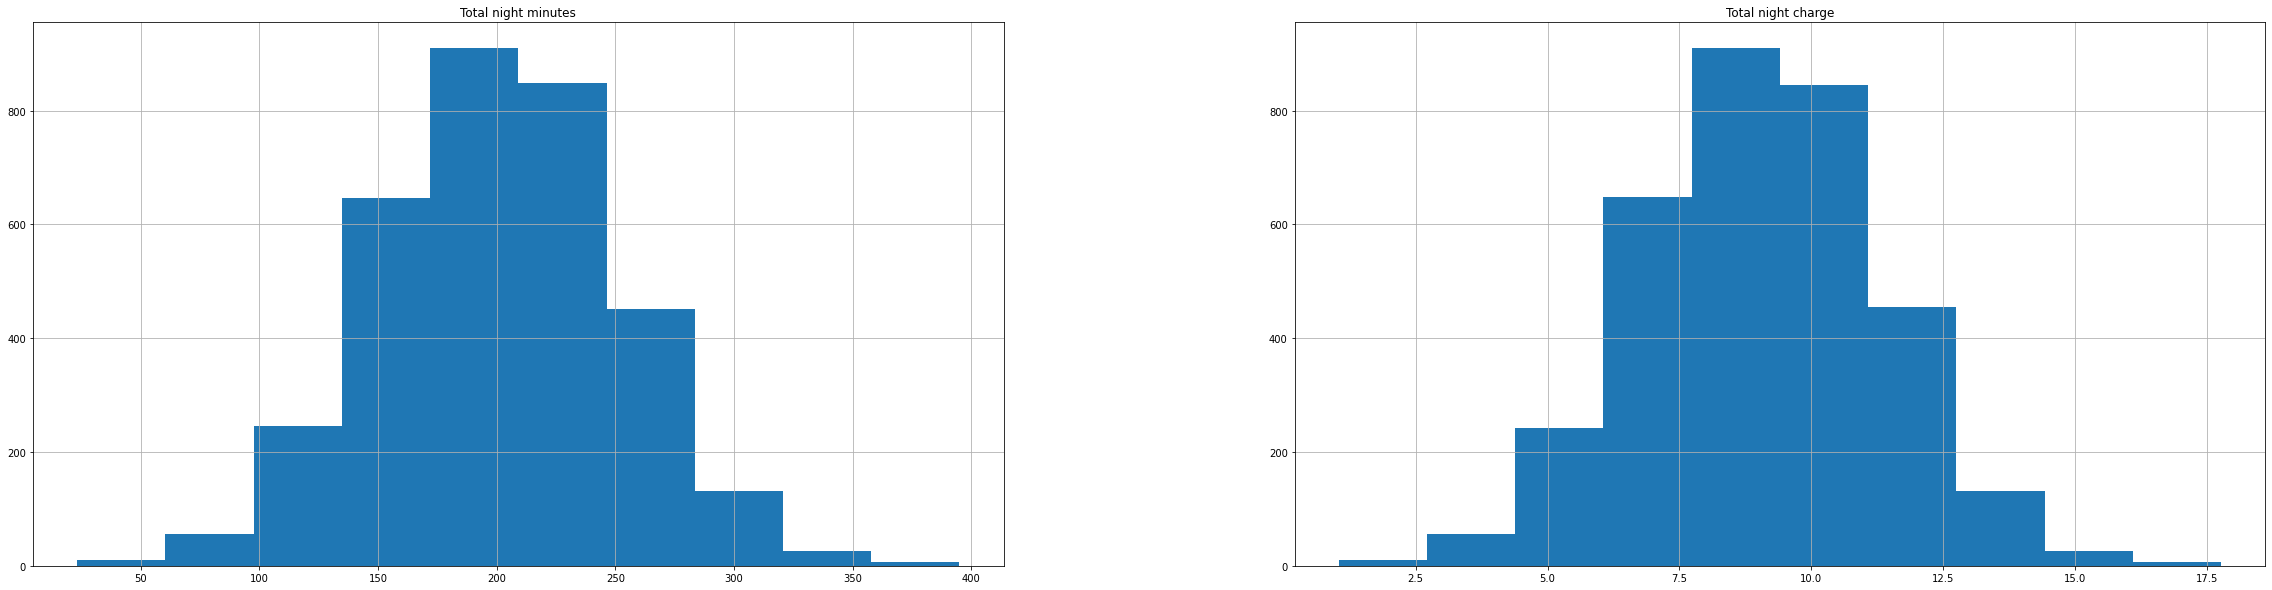

In [ ]:
nightcallhis_df = dep_var_df[['Total night minutes','Total night charge']][0:]
nightcallhis_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d7d1fee90>,
      dtype=object)

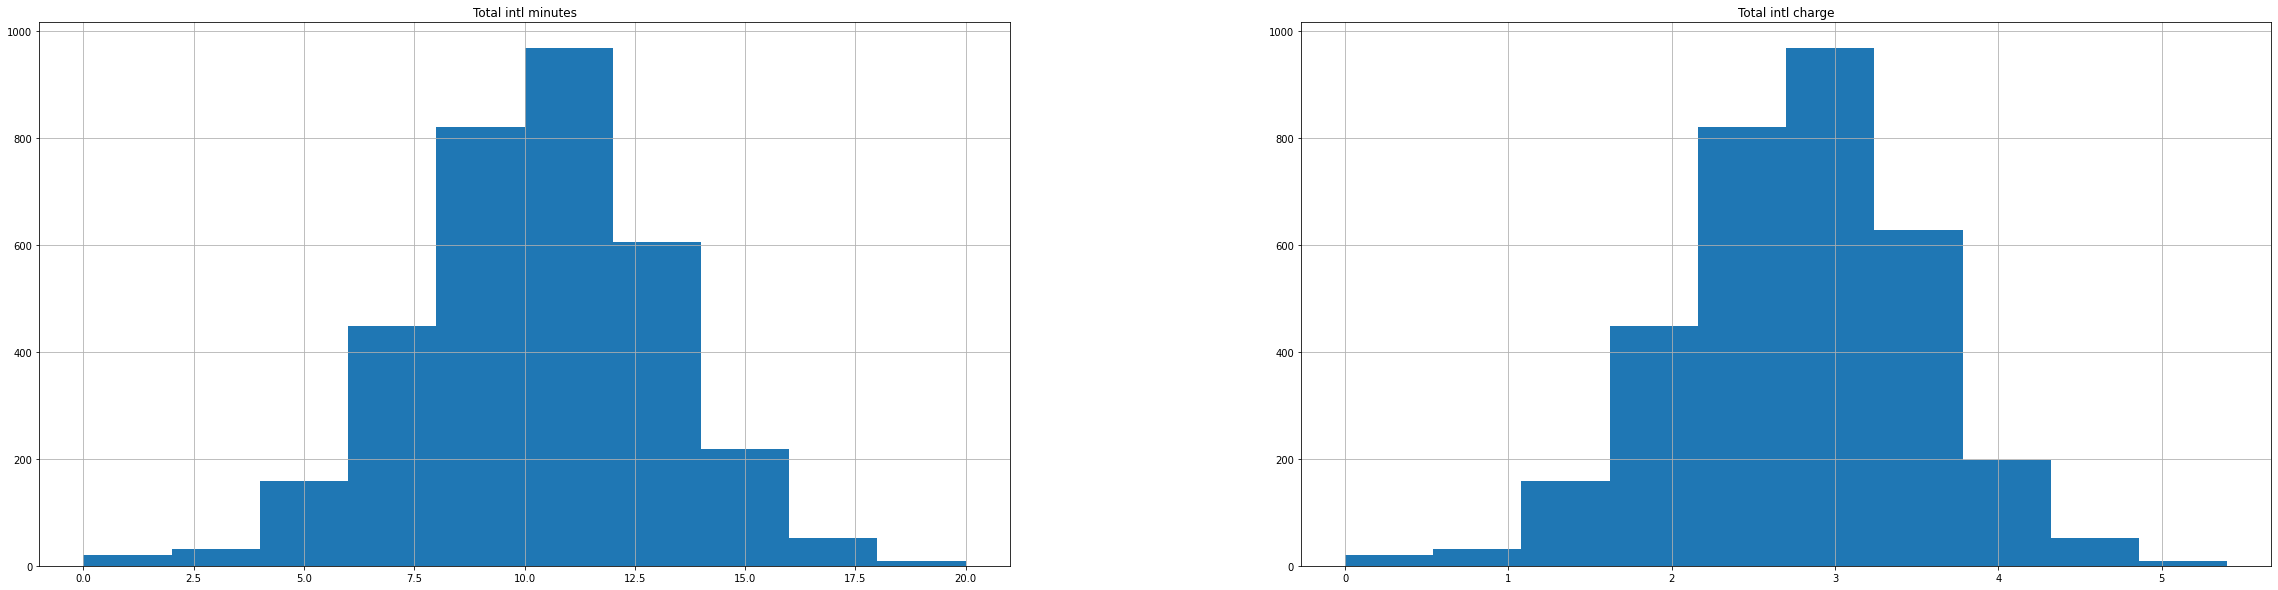

In [ ]:
intlcallhis_df = dep_var_df[['Total intl minutes','Total intl charge']][0:]
intlcallhis_df.hist()

From the above three histogram plots. We can able to see that day call minutes, evening call minutes, night call minutes, and international call minutes have equally distributed data. And there is a direct relation with "charge".  

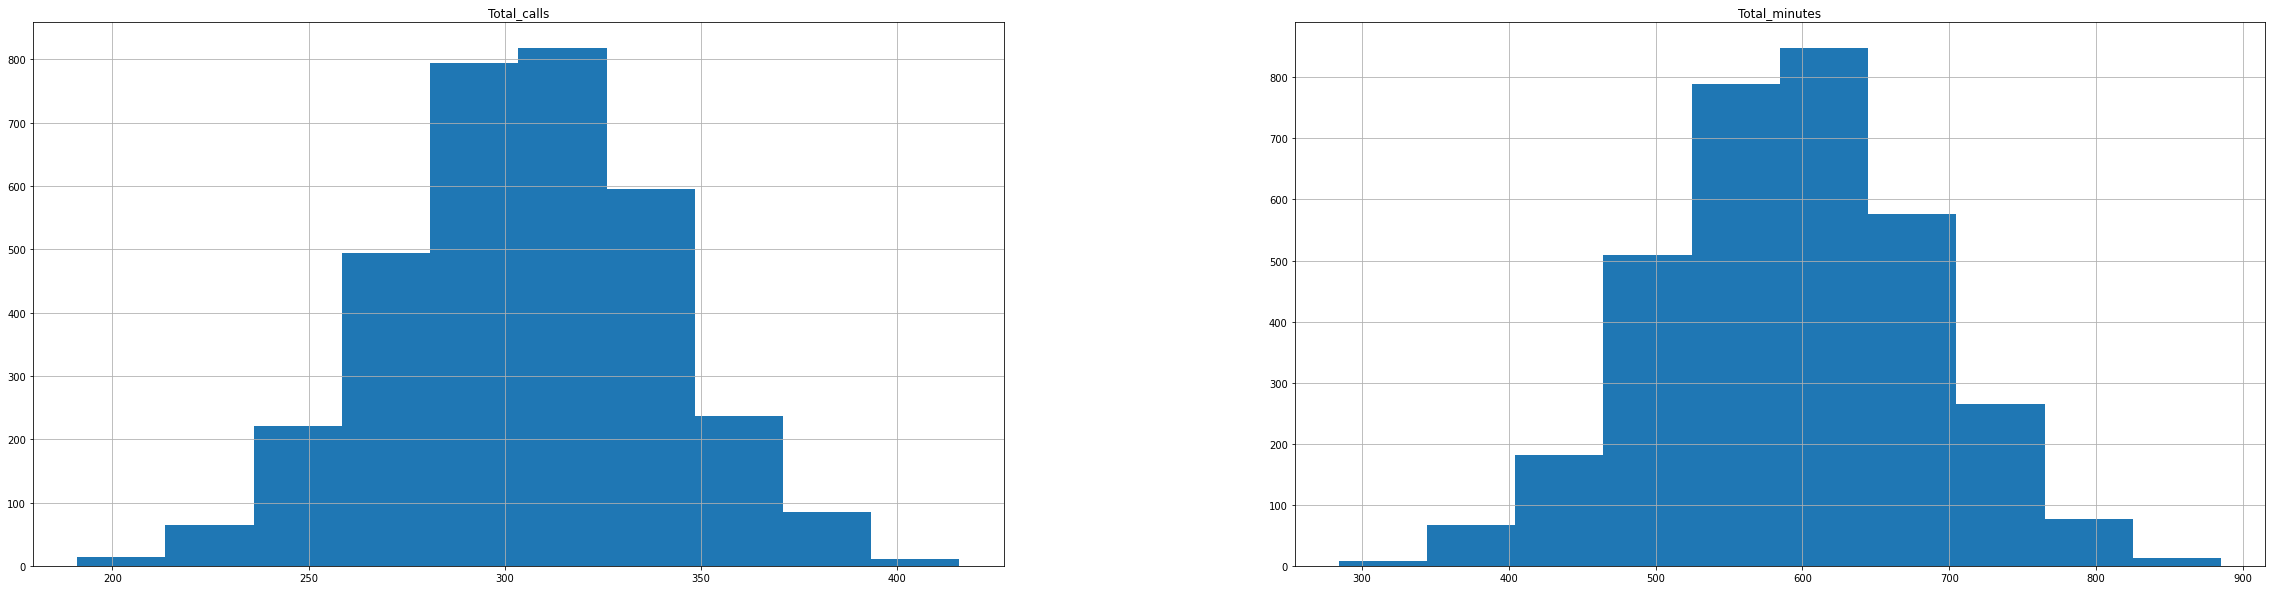

In [ ]:
callvsmin =dep_var_df[['Total_calls','Total_minutes']][0:]
callvsmin.hist()
plt.rcParams['figure.figsize'] = (40,10)

From the above histogram charts there is comparison done between "Total Calls" and "Total Minutes" both datas are uniformly distributed. And there is slight difference between total calls and total minutes. Which might have impact the over charge. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d7d1a9350>,
      dtype=object)

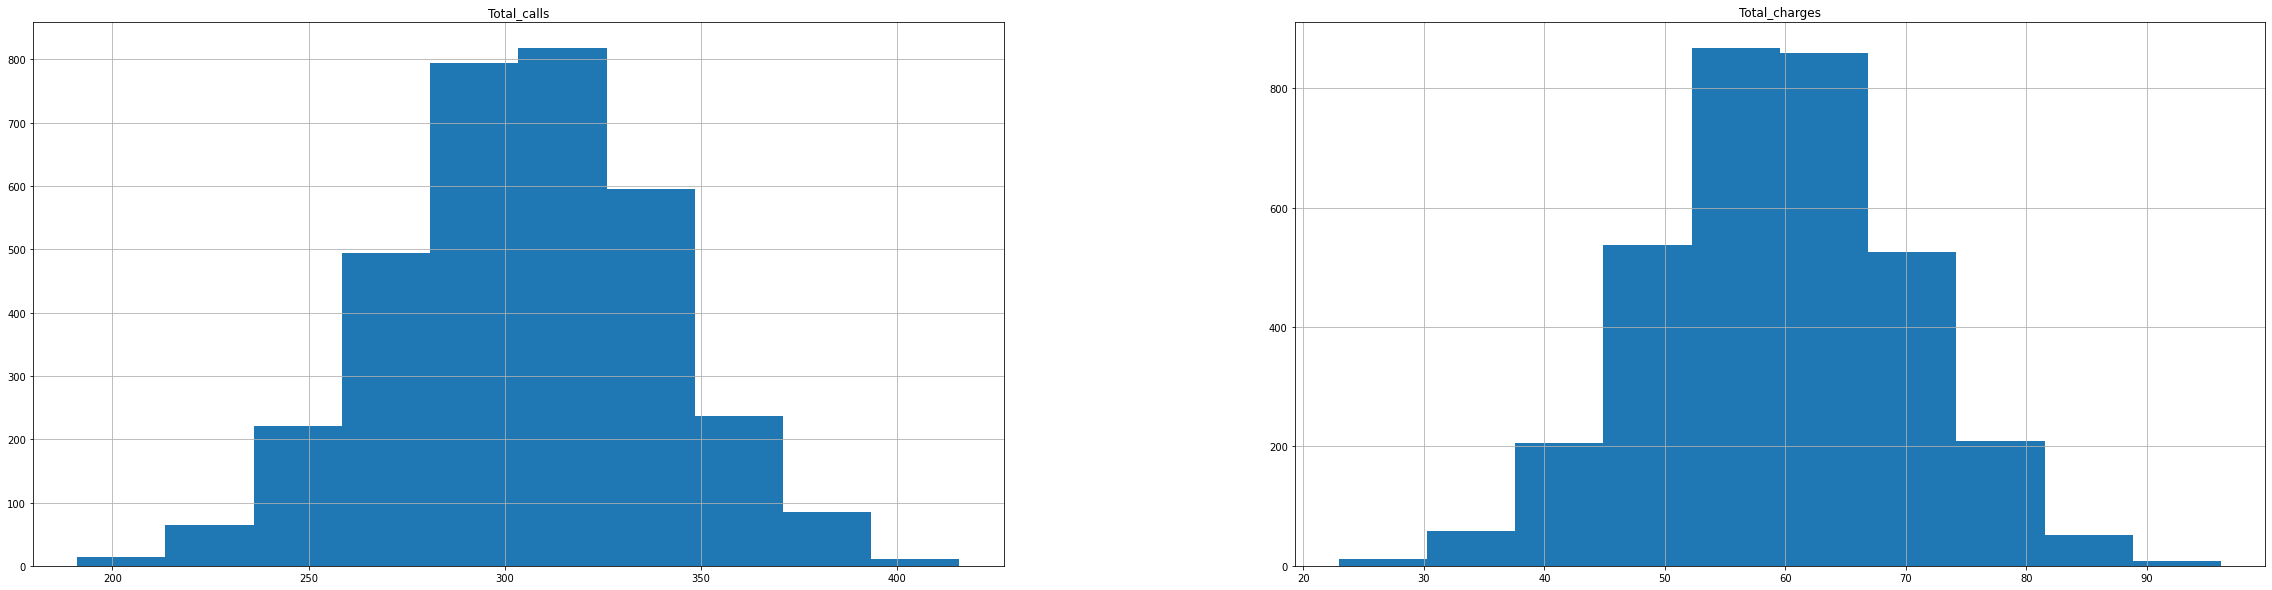

In [ ]:
callsvschar = dep_var_df[['Total_calls','Total_charges']][0:]
callsvschar.hist()

Here from the above histogram charts the total calls and total charges are compared. When comparing total calls vs total charges. we can see total calls alone not have major impact on the total charge.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d7d967e90>,
      dtype=object)

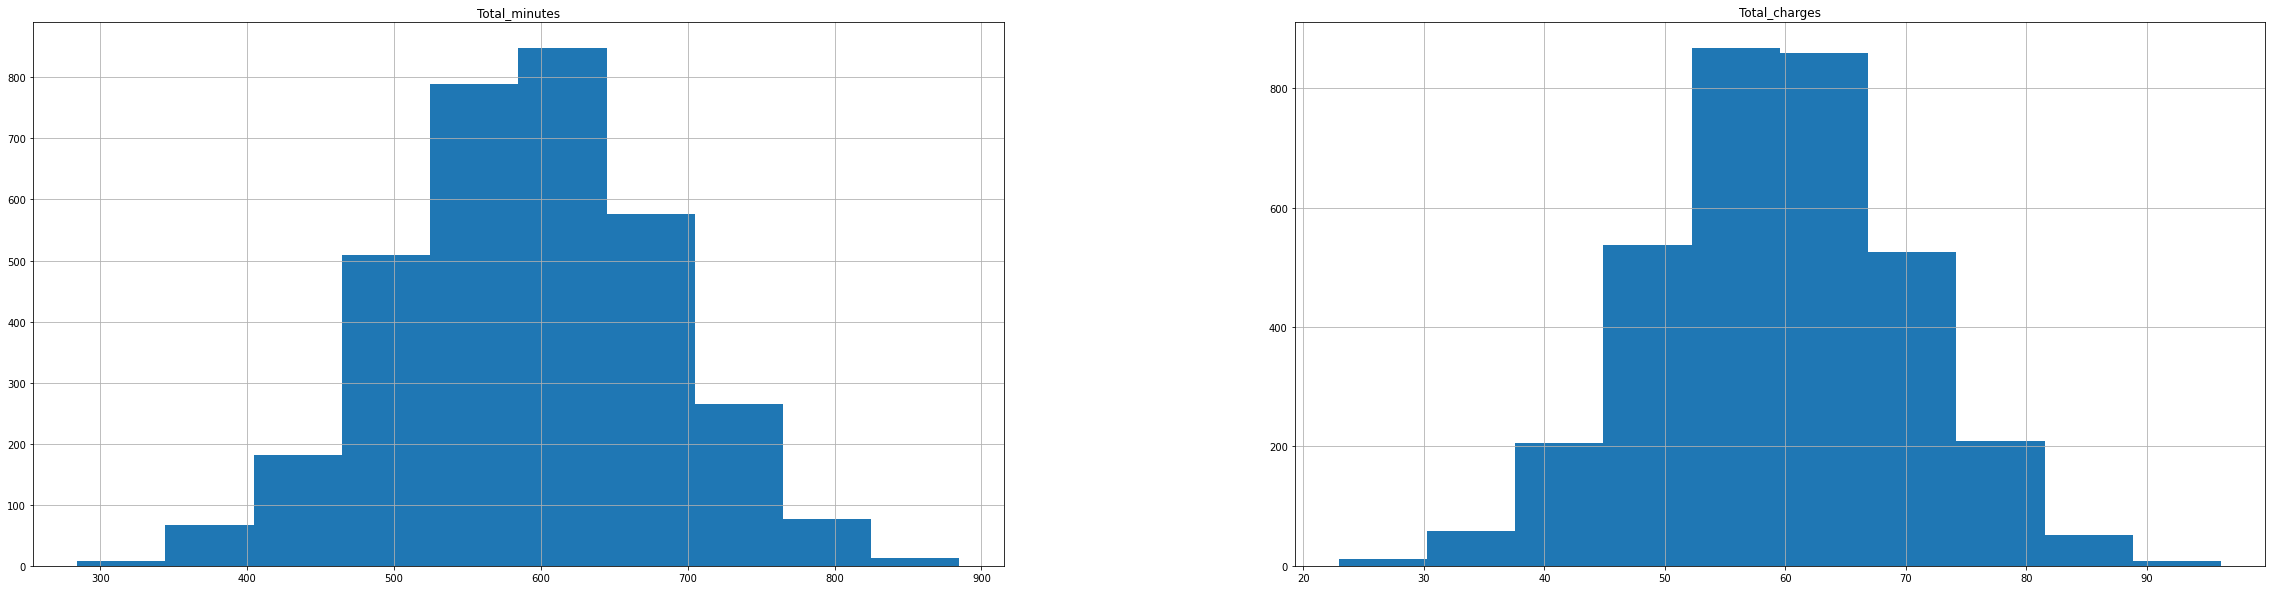

In [ ]:
minvschar = dep_var_df[['Total_minutes','Total_charges']][0:]
minvschar.hist()

Here the above histogram charts shows the comparison between total minutes and total charges. It is obvious that the total minutes have its contribution factorr in the total charge. But if we segment total minutes into seperate fragments then we can able to have conclusion for it.

**State Wise Analysis of the Customer in Churn Column** 

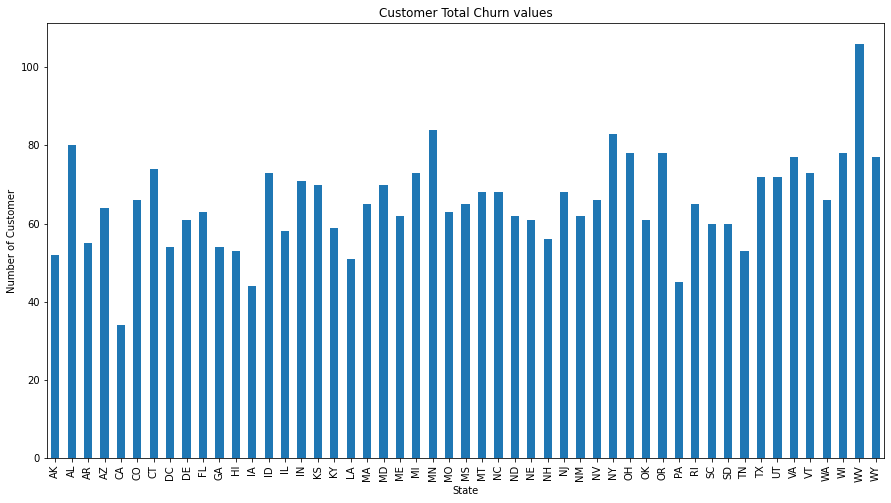

In [ ]:
fig = plt.figure(figsize =(15, 8)) 
plt.title("Customer Total Churn values")
plt.xlabel("State")
plt.ylabel("Number of Customer")
df_state=churn_telecom.groupby(['State'])['Churn'].count()
df_state.plot(kind='bar')

Cutomer of each state who are  getting Churn those values are present by the Chart.

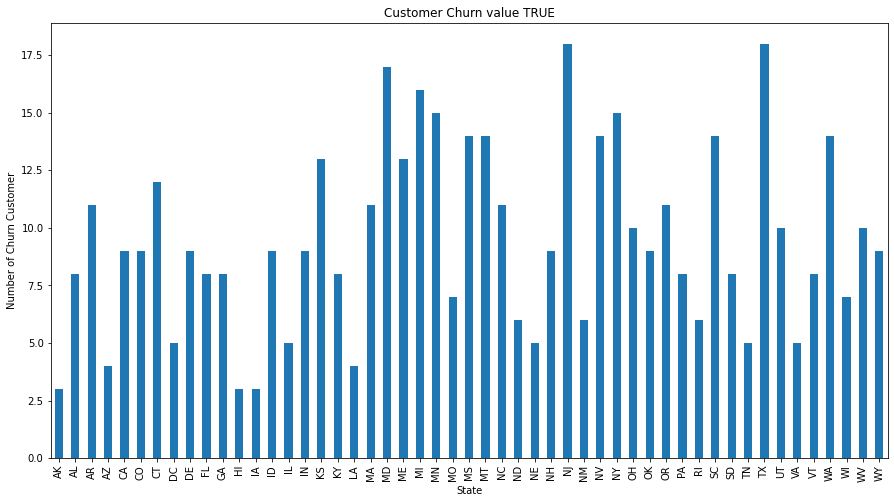

In [ ]:
fig = plt.figure(figsize =(15,8)) 
plt.title("Customer Churn value TRUE")
plt.xlabel("State")
plt.ylabel("Number of Churn Customer")
df_state_true=churn_telecom[churn_telecom['Churn']==True].groupby('State')['Churn'].count()
df_state_true.plot(kind='bar')

Customer of each state who is a loyal cutomer or not getting Churn

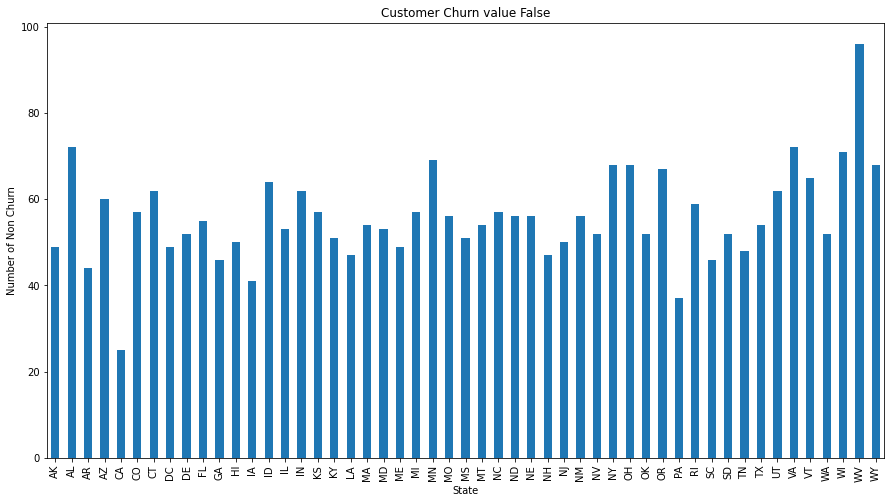

In [ ]:
fig=plt.figure(figsize=(15,8))
plt.title("Customer Churn value False")
plt.xlabel("State")
plt.ylabel("Number of Non Churn")
df_state_false=churn_telecom[churn_telecom['Churn']==False].groupby('State')['Churn'].count()
df_state_false.plot(kind='bar')

By the help of CrossTable we can analyse the Total State wise Customer Churn report.

In [ ]:
pd.crosstab(churn_telecom_copy['Churn'], churn_telecom_copy['State'], margins=True)

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,All
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,46,50,41,64,53,62,57,51,47,54,53,49,57,69,56,51,54,57,56,56,47,50,56,52,68,68,52,67,37,59,46,52,48,54,62,72,65,52,71,96,68,2850
True,3,8,11,4,9,9,12,5,9,8,8,3,3,9,5,9,13,8,4,11,17,13,16,15,7,14,14,11,6,5,9,18,6,14,15,10,9,11,8,6,14,8,5,18,10,5,8,14,7,10,9,483
All,52,80,55,64,34,66,74,54,61,63,54,53,44,73,58,71,70,59,51,65,70,62,73,84,63,65,68,68,62,61,56,68,62,66,83,78,61,78,45,65,60,60,53,72,72,77,73,66,78,106,77,3333


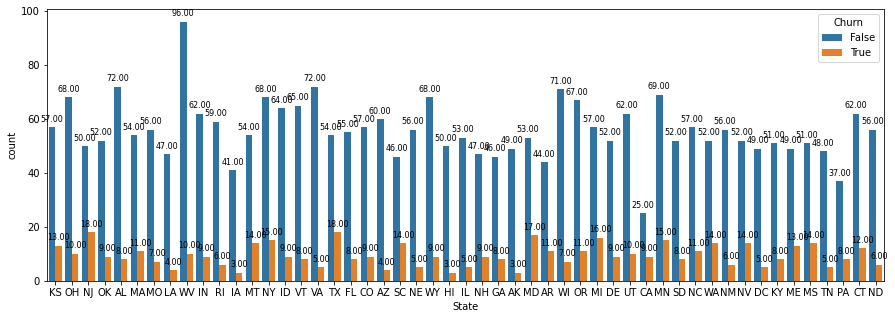

In [ ]:
fig=plt.figure(figsize=(15,5))
# %config InlineBackend.figure_format = 'retina'
plots=sns.countplot(x='State', hue='Churn', data=churn_telecom);
for bar in plots.patches: 
    
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    plots.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0, 8), 
                   textcoords='offset points') 

**By the help of above all analysis we can say that, In each and every state Customer get Churn or not loyal values is more than or equals to     3 (Three)**

## <b> Analyizing the Top states which have higher customer churn rate.

In [ ]:
val1_df = def_var_df[def_var_df['Modifi_Churn']== 1][0:]
new_var_df=val1_df.value_counts().reset_index().head(21)
new_var_df.head(5)

,State,Modifi_Churn,0
0,TX,1,18
1,NJ,1,18
2,MD,1,17
3,MI,1,16
4,NY,1,15


In [ ]:
TX_var_df = dep_var_df[dep_var_df['State']=='TX'][0:]
MD_var_df = dep_var_df[dep_var_df['State']=='MD'][0:]
MI_var_df = dep_var_df[dep_var_df['State']=='MI'][0:]
NJ_var_df = dep_var_df[dep_var_df['State']=='NJ'][0:]
NY_var_df = dep_var_df[dep_var_df['State']=='NY'][0:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d78ef0190>,
      dtype=object)

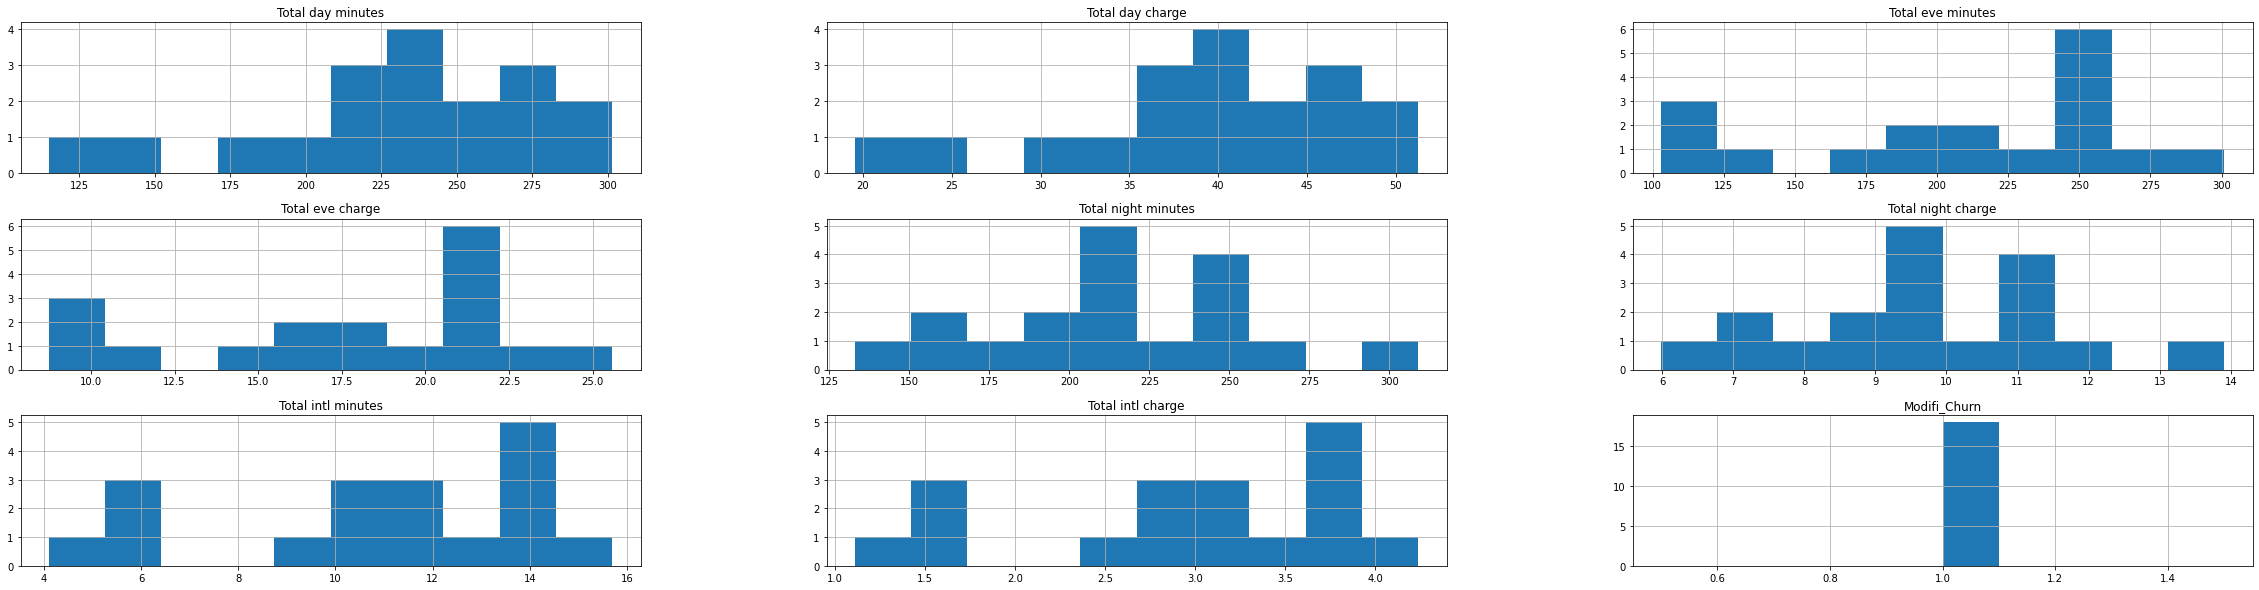

In [ ]:
NJ_var_df.drop(columns=['Churn','Total_calls','Total_minutes','Total_charges','Total intl calls','Total day calls','Total eve calls','Total night calls'],inplace=True)
NJ1_df = NJ_var_df[NJ_var_df['Modifi_Churn'] == 1][0:]
NJ1_df.hist()

Text(0, 0.5, 'Values')

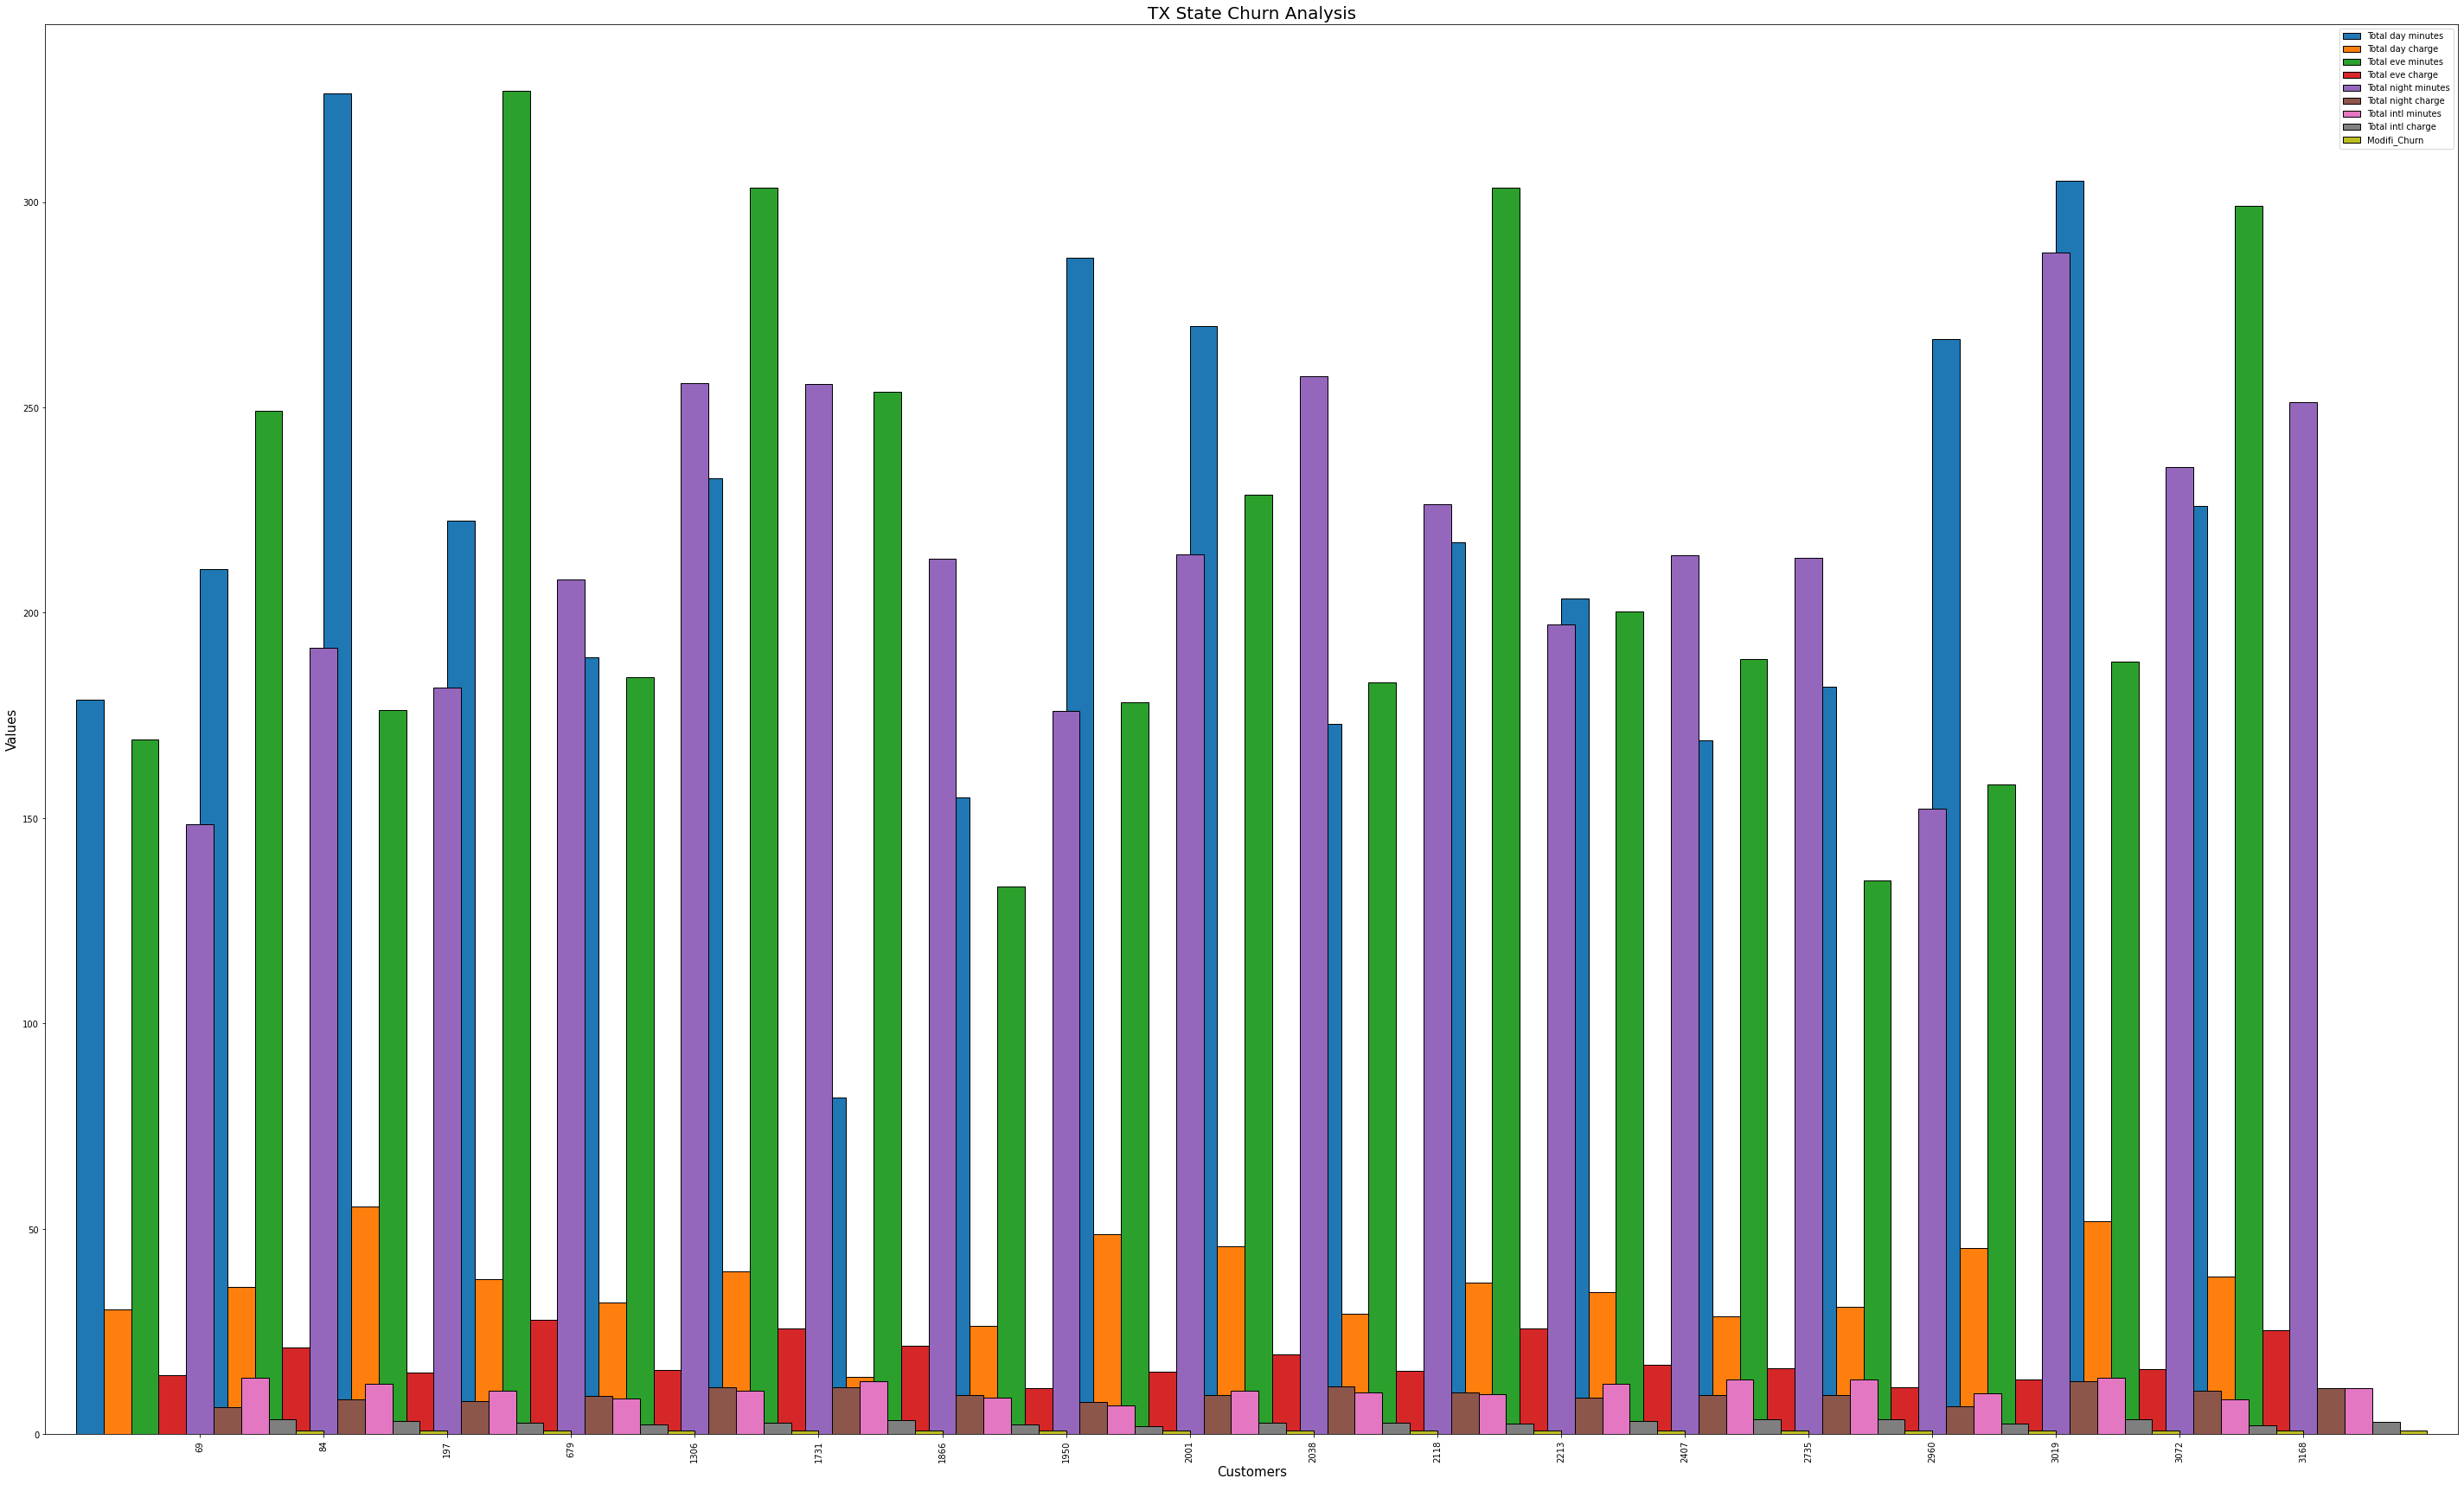

In [ ]:
TX_var_df.drop(columns=['Churn','Total_calls','Total_minutes','Total_charges'],inplace=True)
TX_var_df.drop(columns=['Total day calls','Total intl calls','Total eve calls','Total night calls'],inplace=True)
TX1_df = TX_var_df[TX_var_df['Modifi_Churn'] == 1][0:]
ax = TX1_df.plot.bar(width=2.0,linewidth=1,edgecolor='black',figsize = (50,30),fontsize = 10,)

ax.set_title("TX State Churn Analysis", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Customers", fontsize = 15)
ax.set_ylabel("Values", fontsize = 15)

In [ ]:
TX1_df.hist()

MI_var_df.drop(columns=['Churn','Total_calls','Total_minutes','Total_charges','Total intl calls','Total day calls','Total eve calls','Total night calls'],inplace=True)
MI1_df = MI_var_df[MI_var_df['Modifi_Churn'] == 1][0:]
sx = MI1_df.plot.bar(width=2.0,linewidth=1,edgecolor='black',figsize = (50,25),fontsize = 10,)
sx.set_title("MI State Churn Analysis", fontsize = 20)
sx.set_xlabel("Customers", fontsize = 15)
sx.set_ylabel("Values", fontsize = 15)

Text(0, 0.5, 'Values')

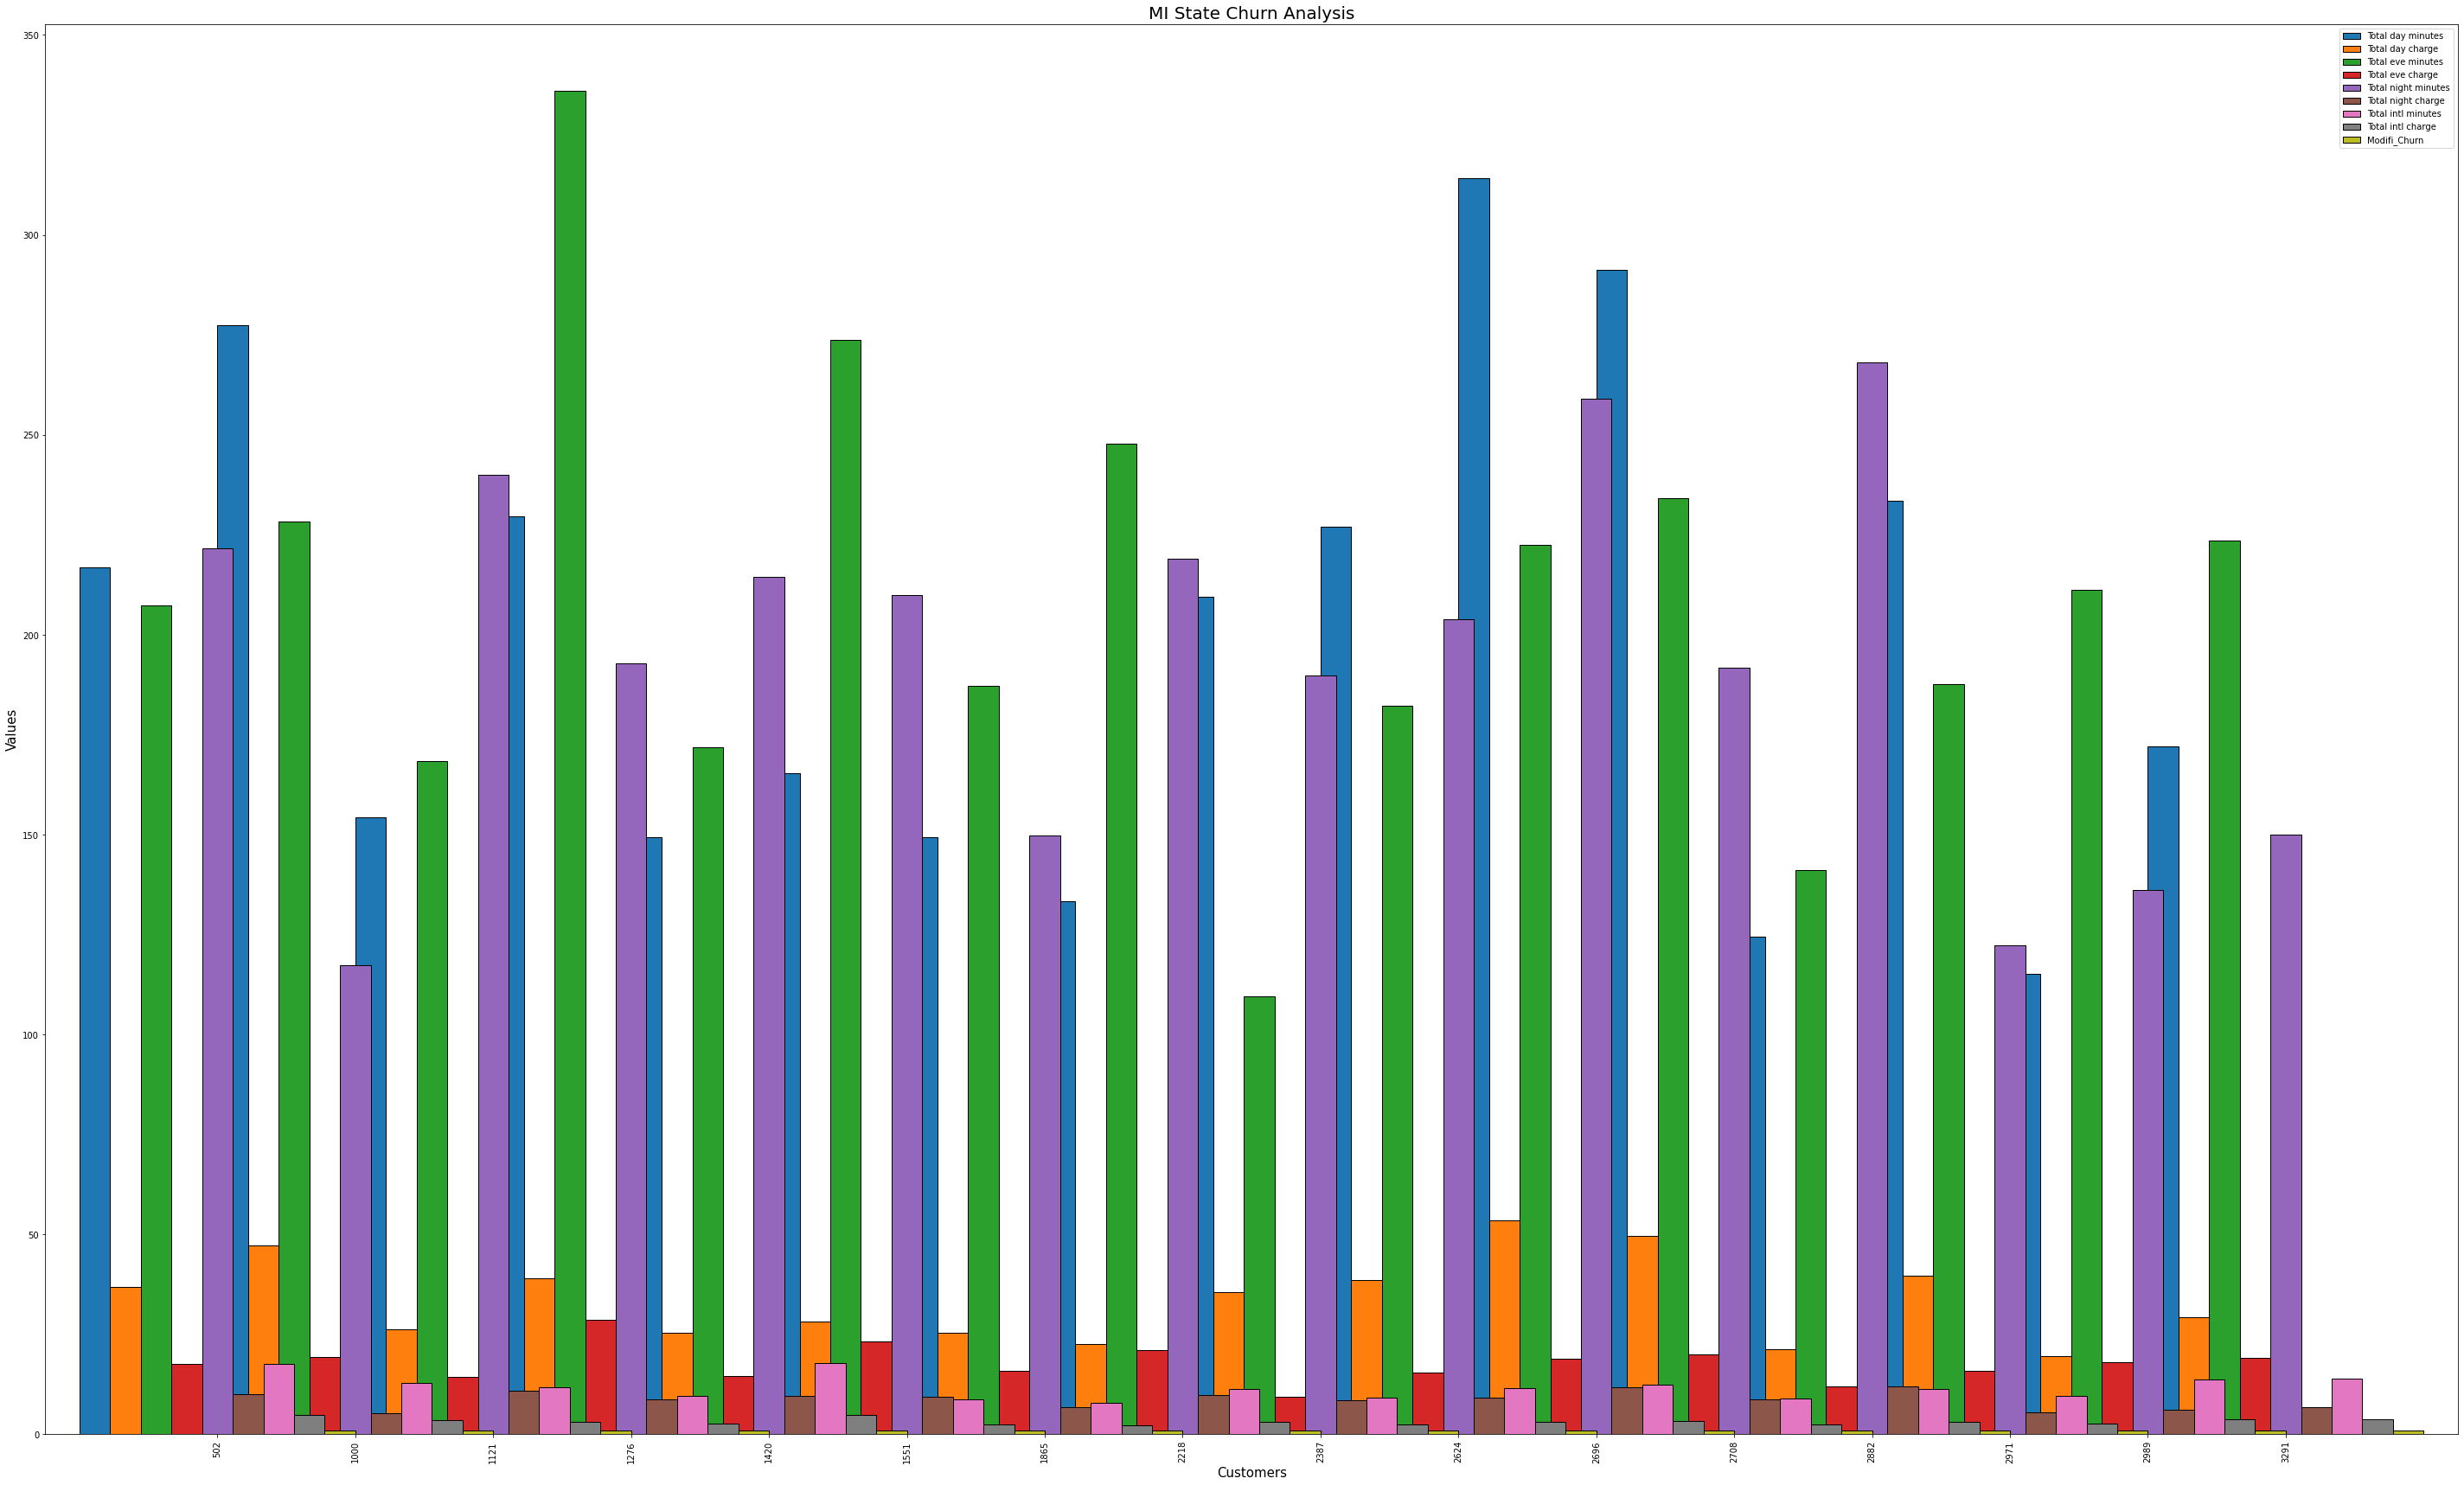

In [ ]:
MI_var_df.drop(columns=['Churn','Total_calls','Total_minutes','Total_charges'],inplace=True)
MI_var_df.drop(columns=['Total day calls','Total intl calls','Total eve calls','Total night calls'],inplace=True)
MI1_df = MI_var_df[MI_var_df['Modifi_Churn'] == 1][0:]
ax = MI1_df.plot.bar(width=2.0,linewidth=1,edgecolor='black',figsize = (50,30),fontsize = 10,)

ax.set_title("MI State Churn Analysis", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Customers", fontsize = 15)
ax.set_ylabel("Values", fontsize = 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d775e21d0>,
      dtype=object)

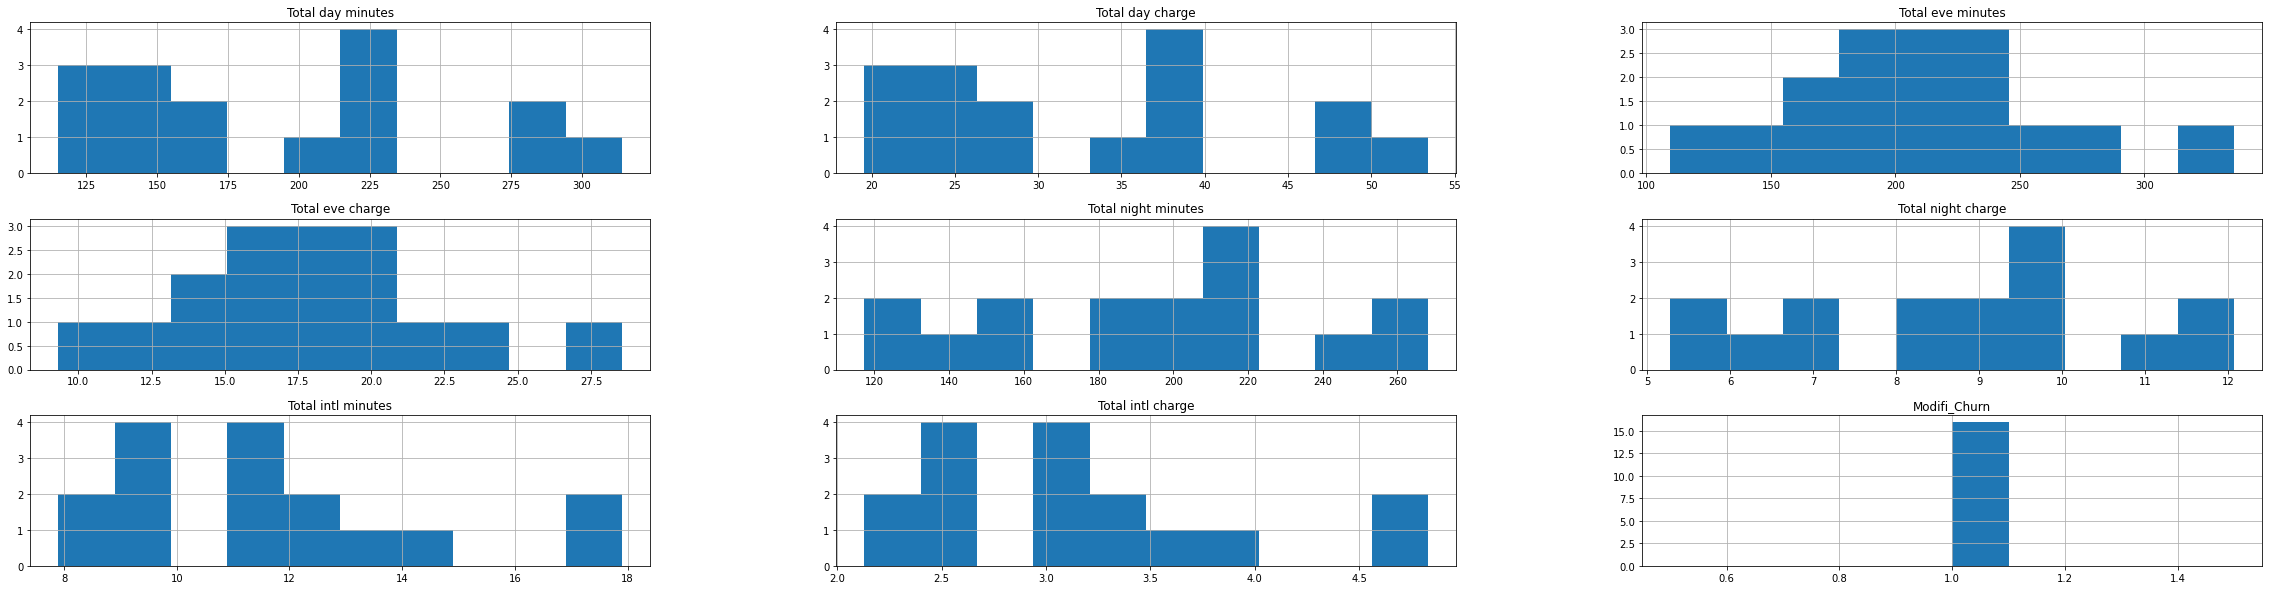

In [ ]:
MI1_df.hist()

Text(0, 0.5, 'Values')

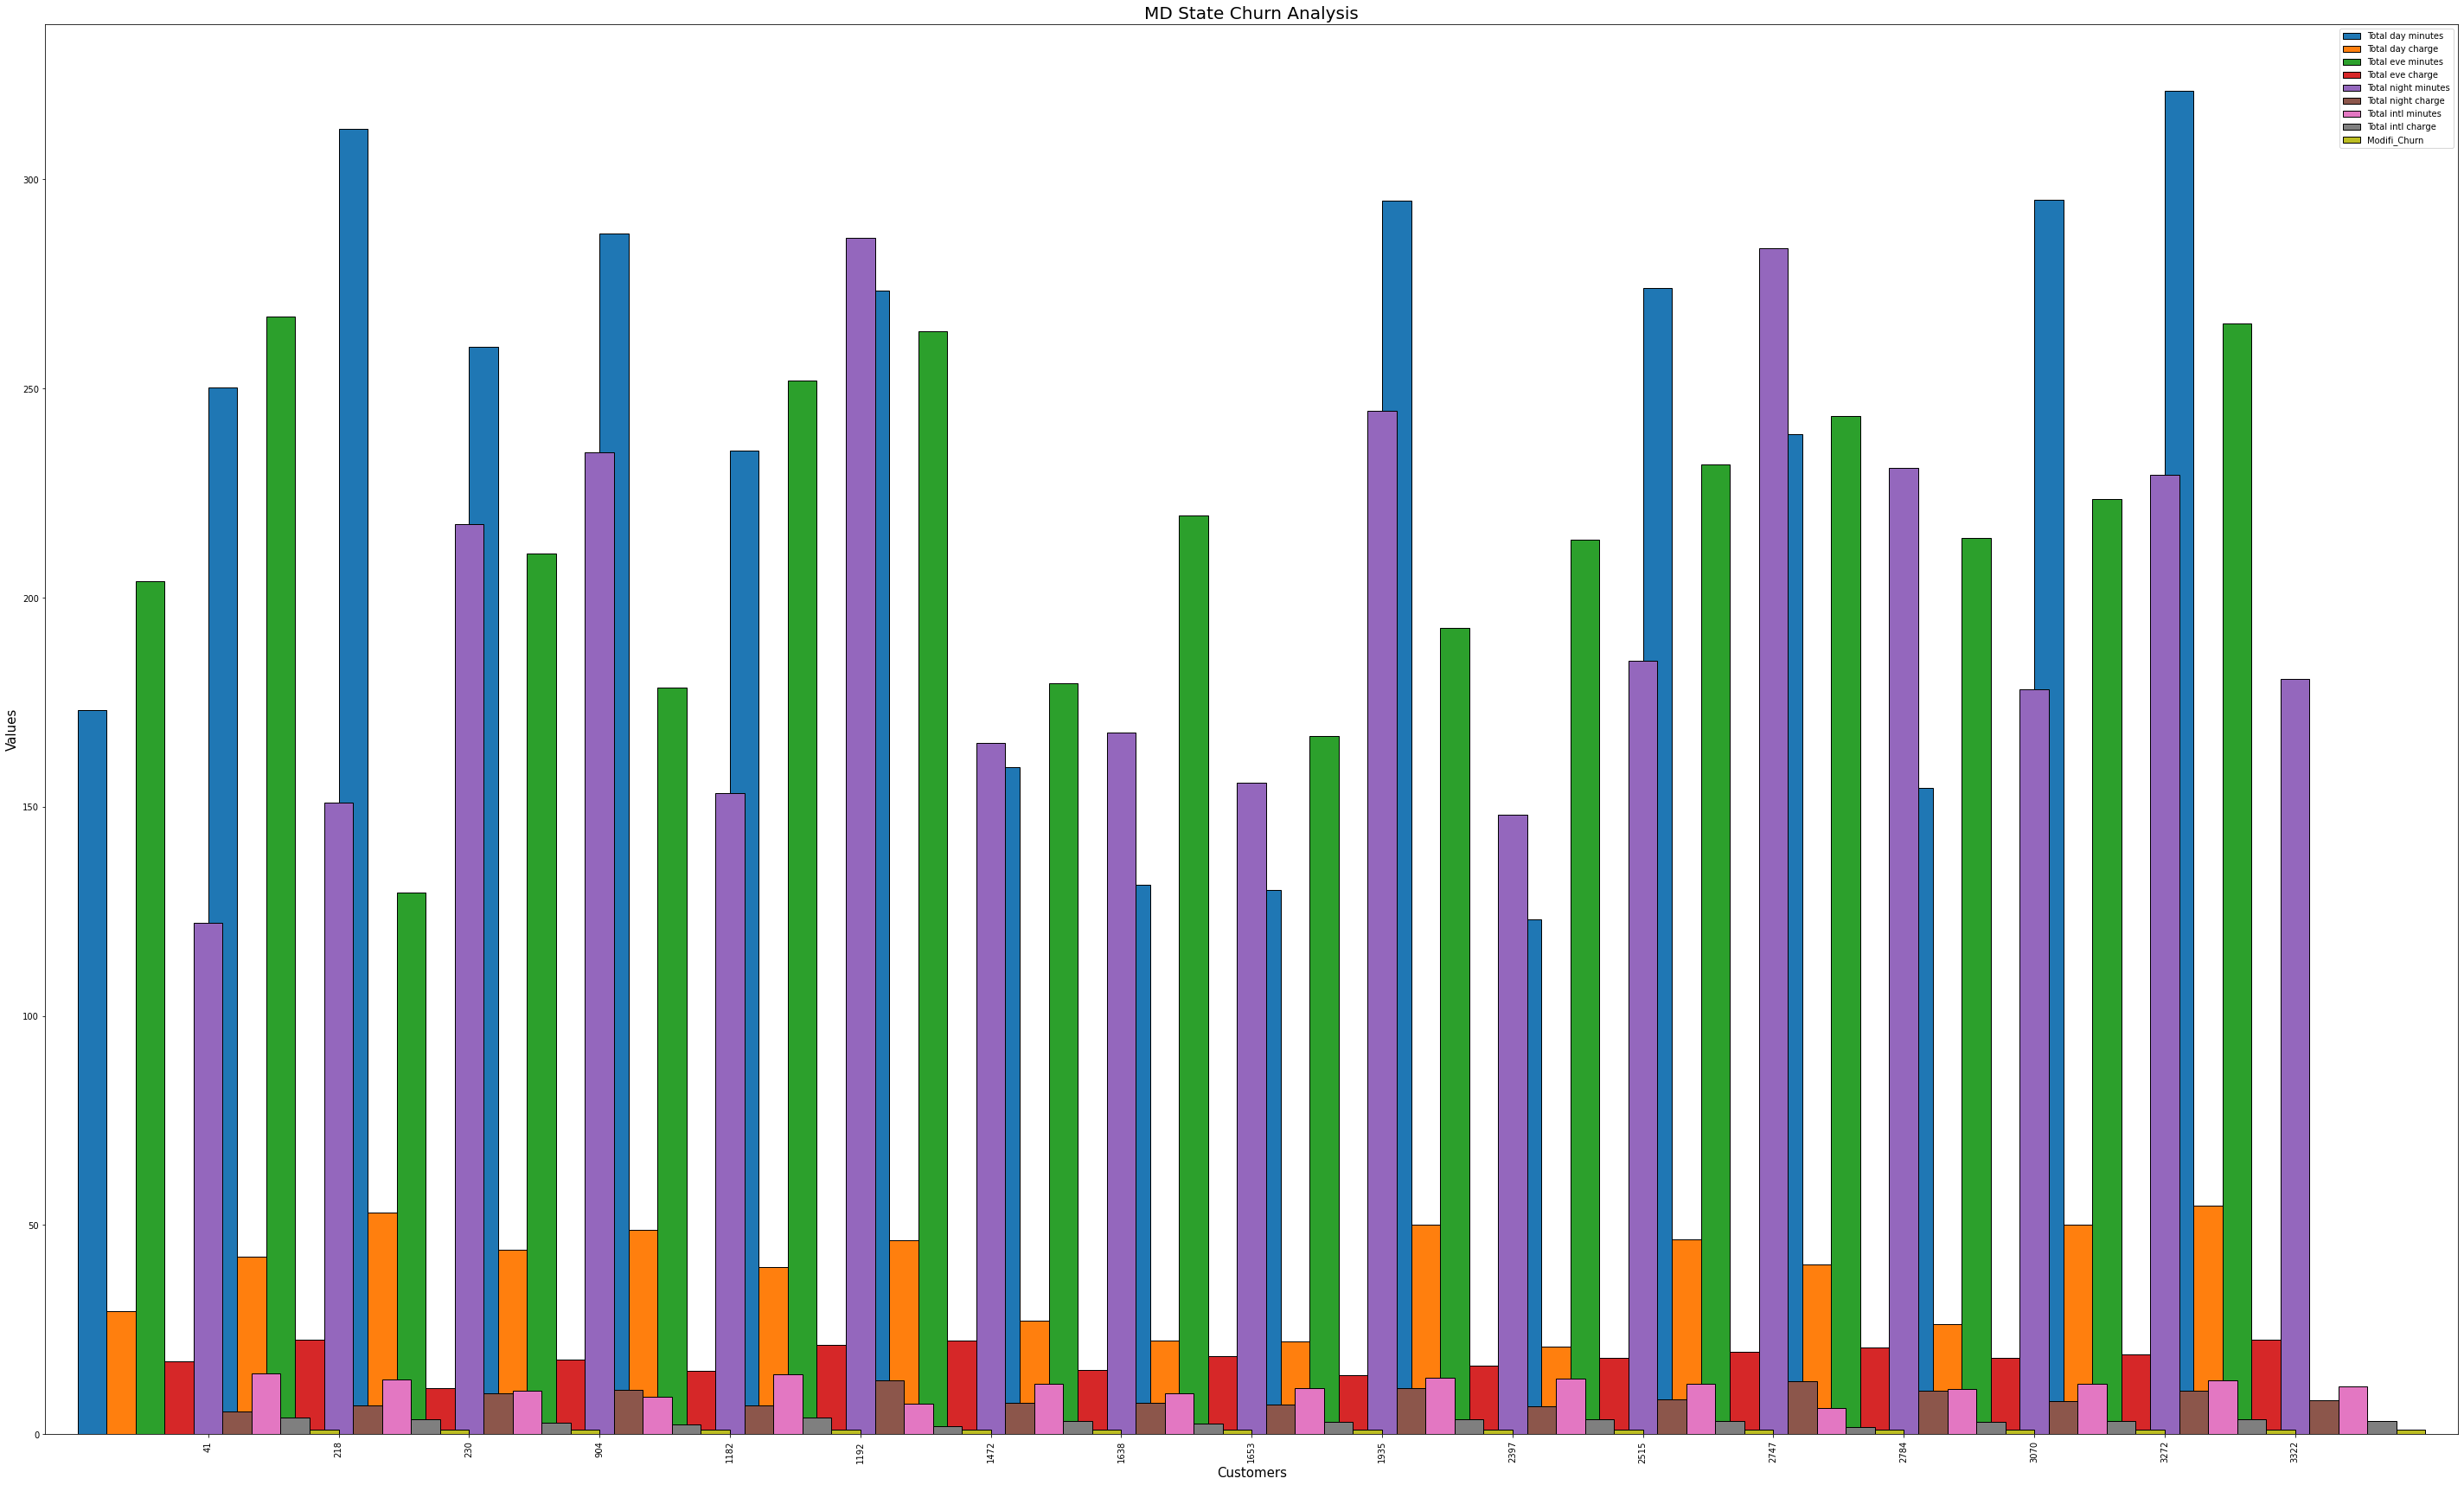

In [ ]:
MD_var_df.drop(columns=['Churn','Total_calls','Total_minutes','Total_charges'],inplace=True)
MD_var_df.drop(columns=['Total day calls','Total intl calls','Total eve calls','Total night calls'],inplace=True)
MD1_df = MD_var_df[MD_var_df['Modifi_Churn'] == 1][0:]
ax = MD1_df.plot.bar(width=2.0,linewidth=1,edgecolor='black',figsize = (50,30),fontsize = 10,)

ax.set_title("MD State Churn Analysis", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Customers", fontsize = 15)
ax.set_ylabel("Values", fontsize = 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d7723d310>,
      dtype=object)

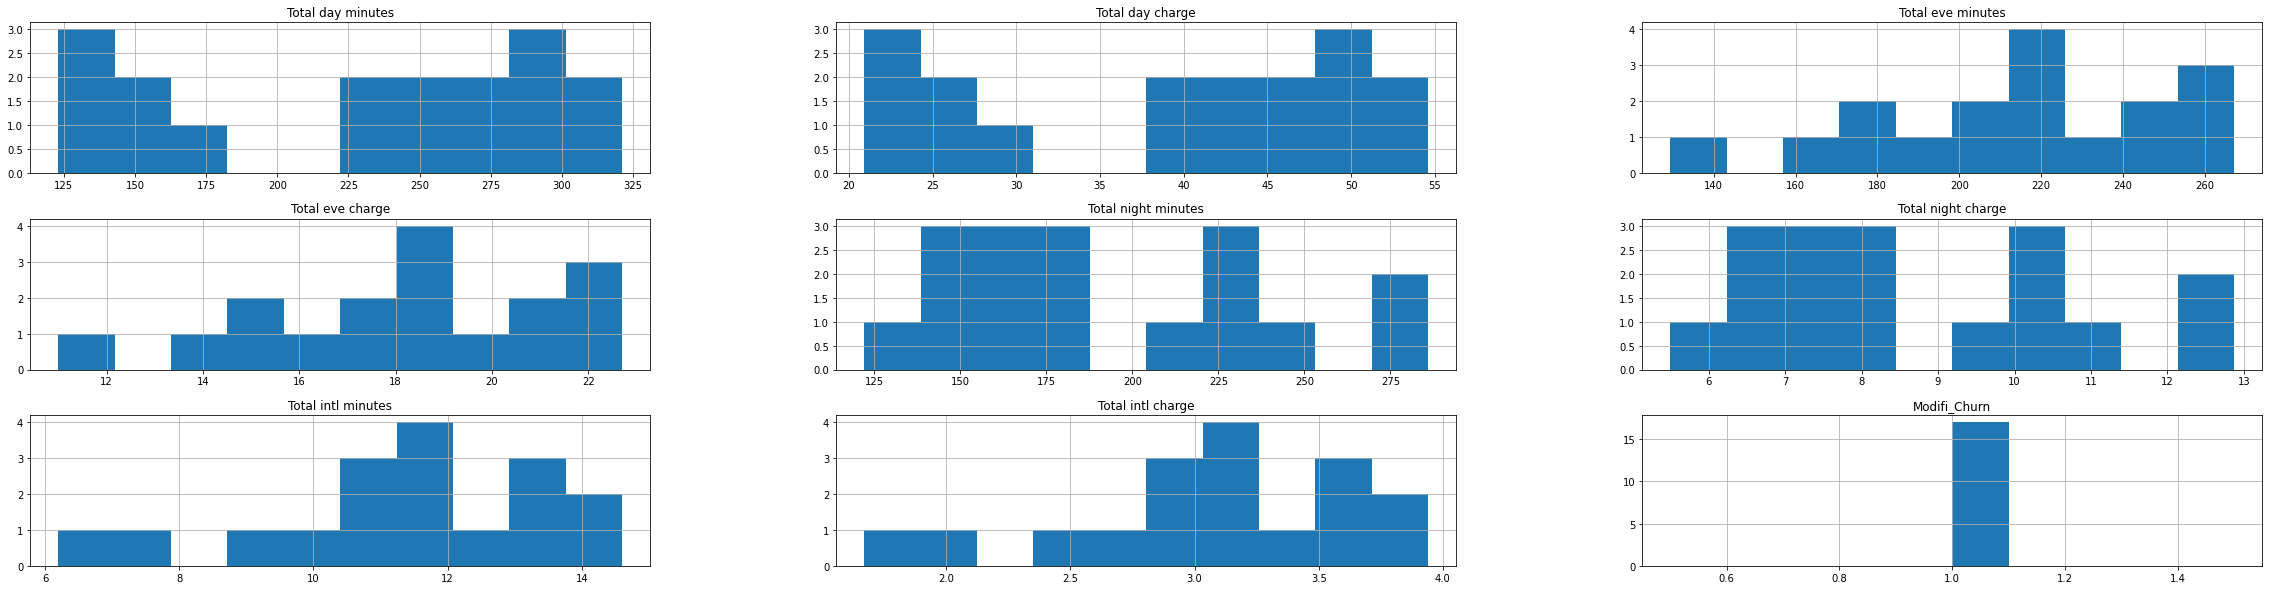

In [ ]:
MD1_df.hist()

Text(0, 0.5, 'Values')

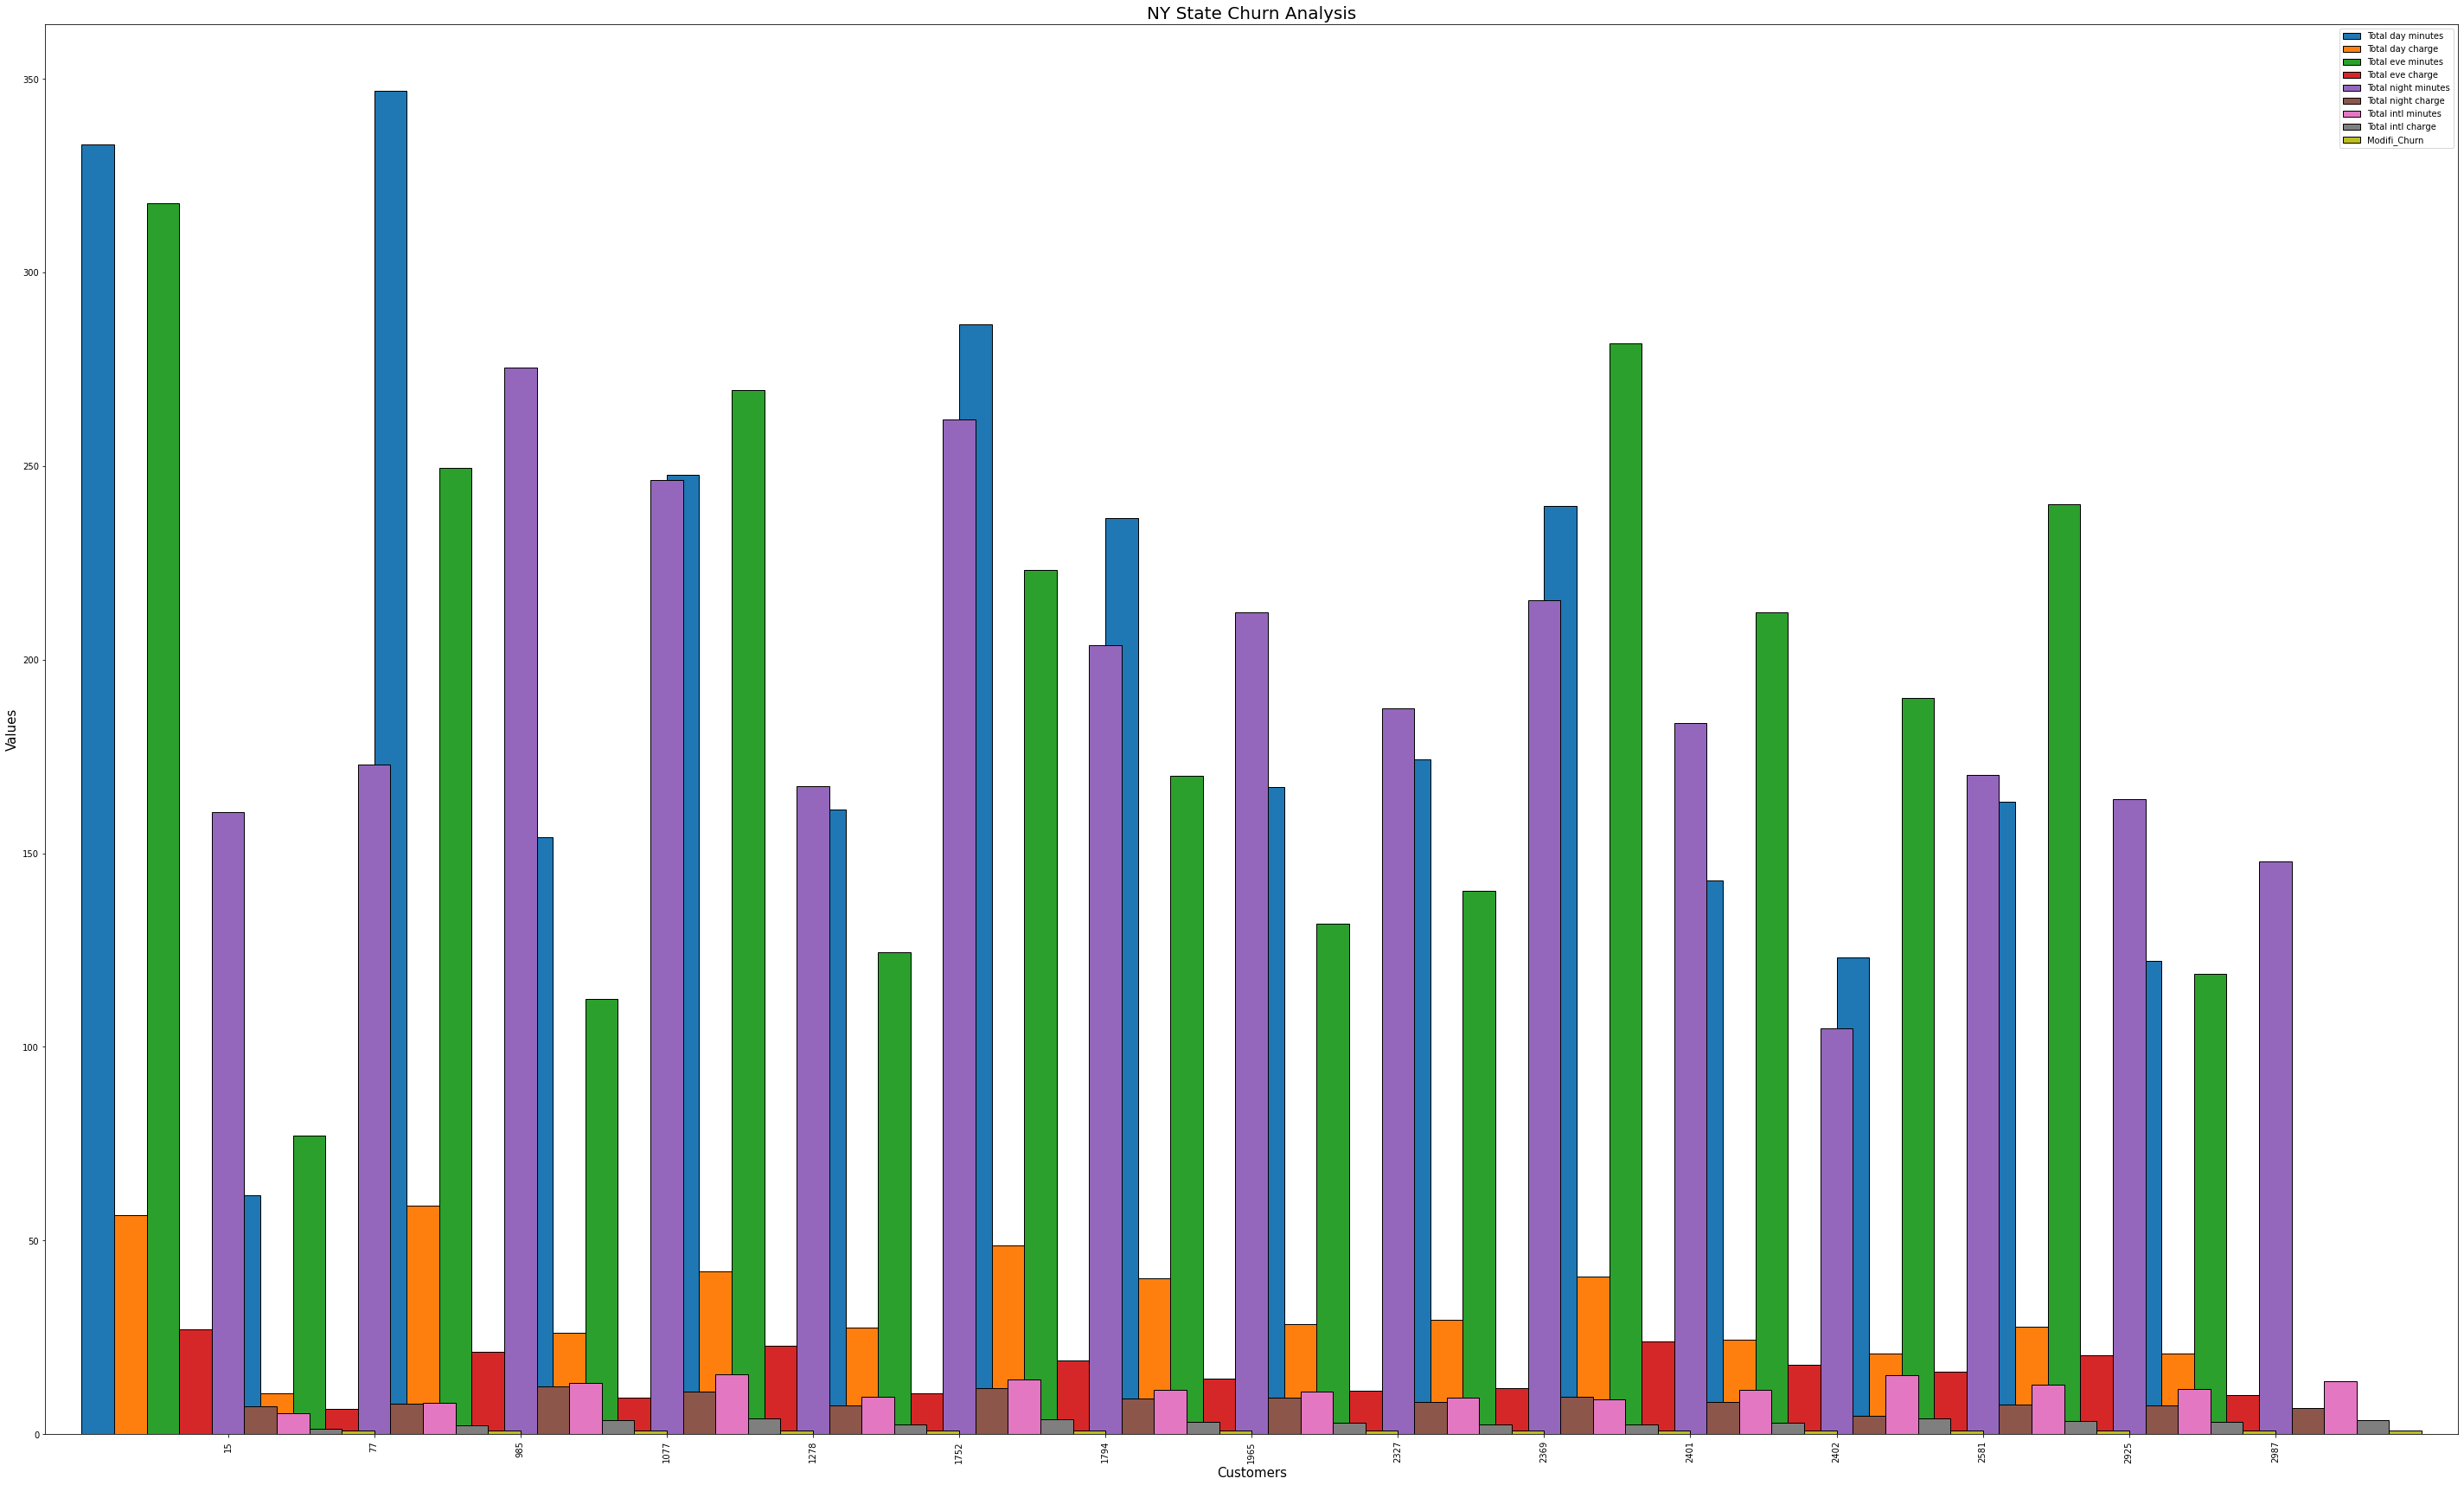

In [ ]:
NY_var_df.drop(columns=['Churn','Total_calls','Total_minutes','Total_charges'],inplace=True)
NY_var_df.drop(columns=['Total day calls','Total intl calls','Total eve calls','Total night calls'],inplace=True)
NY1_df = NY_var_df[NY_var_df['Modifi_Churn'] == 1][0:]
ax = NY1_df.plot.bar(width=2.0,linewidth=1,edgecolor='black',figsize = (50,30),fontsize = 10,)

ax.set_title("NY State Churn Analysis", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Customers", fontsize = 15)
ax.set_ylabel("Values", fontsize = 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d7715e750>,
      dtype=object)

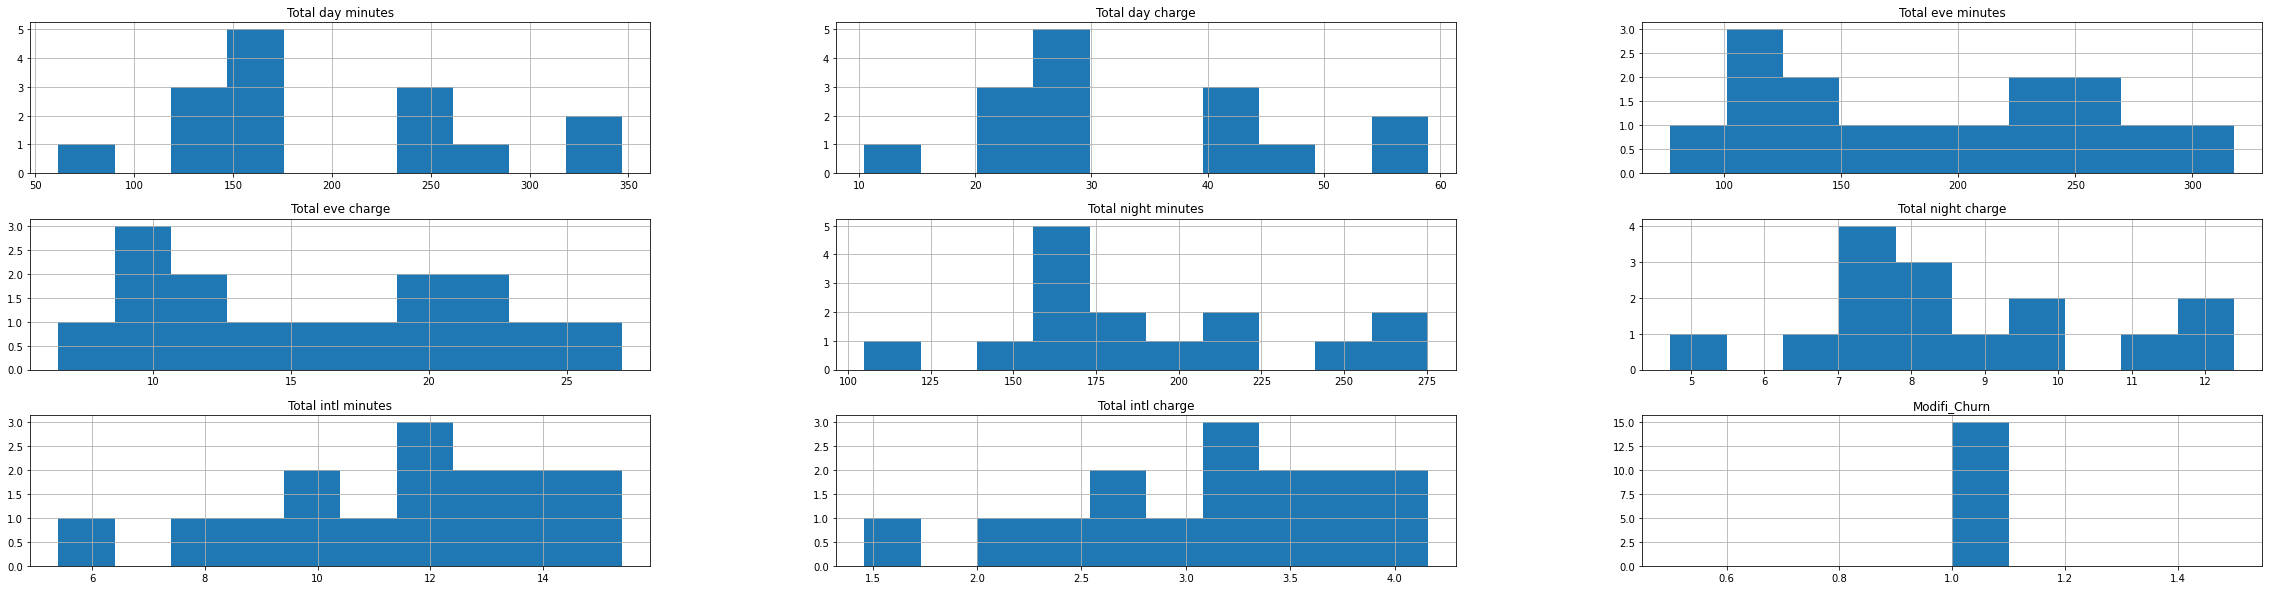

In [ ]:
NY1_df.hist()

Here we analysis state wise feature analysis of the top five higher churn rate states

## <b> Let's see what other factors impact on the churn!

---



In [ ]:
other_fac_df = df.loc[0: ,['Account length','Area code','International plan','Voice mail plan','Number vmail messages','Customer service calls','Churn']]

In [ ]:
other_fac_df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Customer service calls,Churn
0,128,415,No,Yes,25,1,False
1,107,415,No,Yes,26,1,False
2,137,415,No,No,0,0,False
3,84,408,Yes,No,0,2,False
4,75,415,Yes,No,0,3,False


In [ ]:
other_fac_df['Churn'] = other_fac_df['Churn'].astype(int)

In [ ]:
other_fac_df.value_counts().reset_index()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Customer service calls,Churn,0
0,90,415,No,No,0,2,0,8
1,80,415,No,No,0,1,0,8
2,99,415,No,No,0,1,0,7
3,90,415,No,No,0,1,0,7
4,120,415,No,No,0,1,0,6
...,...,...,...,...,...,...,...,...
2573,118,415,No,No,0,0,0,1
2574,118,408,Yes,Yes,39,1,0,1
2575,118,408,Yes,Yes,21,4,1,1
2576,118,408,Yes,No,0,2,0,1


In [ ]:
others1 = other_fac_df[other_fac_df['Churn']==1][0:]

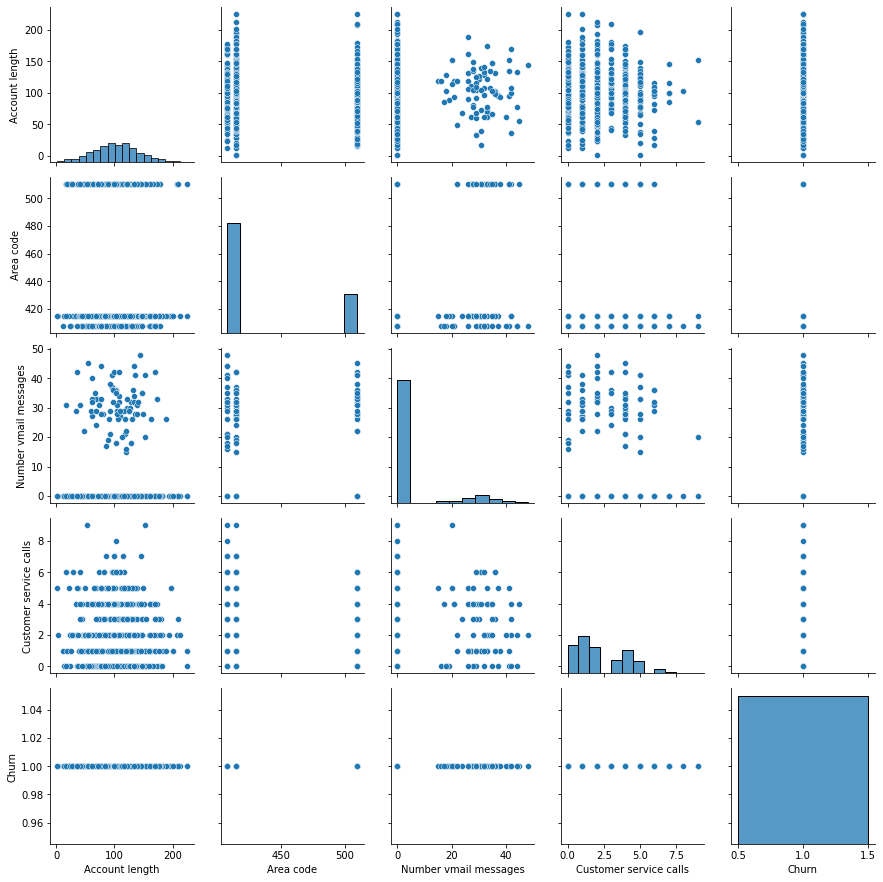

In [ ]:
v = sns.PairGrid(others1)
v.map_diag(sns.histplot)
v.map_offdiag(sns.scatterplot)

In [ ]:
others1.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Customer service calls,Churn
10,65,415,No,No,0,4,1
15,161,415,No,No,0,4,1
21,77,408,No,No,0,5,1
33,12,408,No,No,0,1,1
41,135,408,Yes,Yes,41,0,1


In [ ]:
z_df = others1.value_counts().reset_index()
z_df.head(50)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Customer service calls,Churn,0
0,88,415,No,No,0,4,1,3
1,125,415,Yes,No,0,0,1,2
2,111,415,No,No,0,4,1,2
3,96,415,No,No,0,1,1,2
4,107,415,No,No,0,1,1,2
5,82,415,No,No,0,3,1,2
6,115,415,No,No,0,1,1,2
7,108,415,No,No,0,4,1,2
8,65,415,No,No,0,4,1,2
9,64,415,Yes,No,0,1,1,2


In [ ]:
vmp = df.loc[:,['Voice mail plan','Churn']]
vmp1 = vmp.value_counts().reset_index()
vmp1

,Voice mail plan,Churn,0
0,No,False,2008
1,Yes,False,842
2,No,True,403
3,Yes,True,80


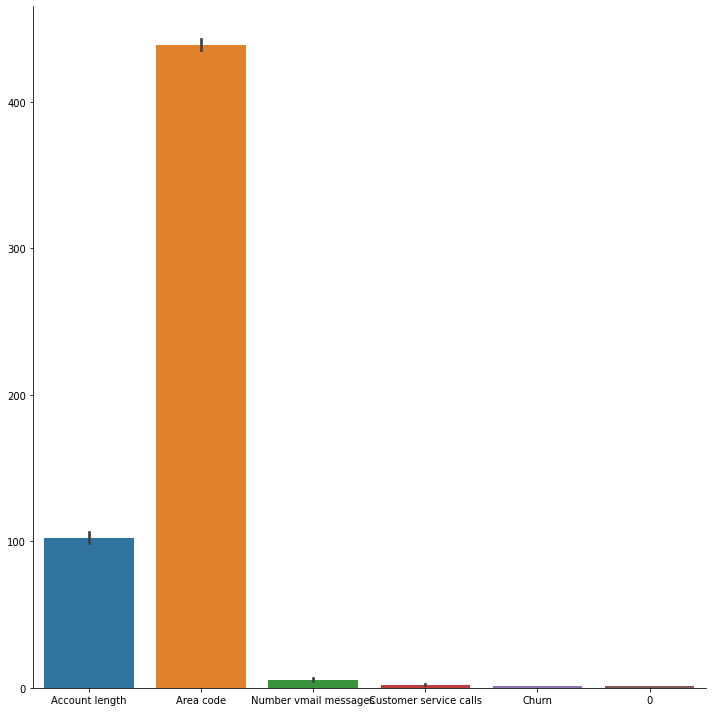

In [ ]:
g = sns.catplot(data= z_df, kind='bar',height=10)

**Firstly make the pie chart of the Churn cutomer column**

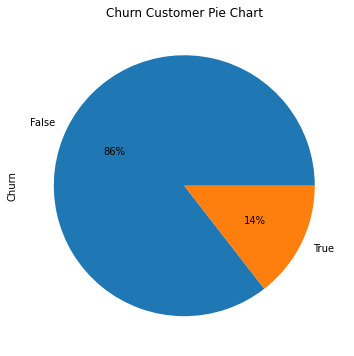

In [ ]:
fig = plt.figure(figsize =(7, 6)) 
plt.title('Churn Customer Pie Chart')
churn_telecom['Churn'].value_counts(normalize=True).plot.pie(label='Churn', autopct='%1.0f%%')

**Area Code Wise Analysis of Churn Customer Column**

Area code wise total churn colum of Customer

Area code
408     838
415    1655
510     840
Name: Churn, dtype: int64


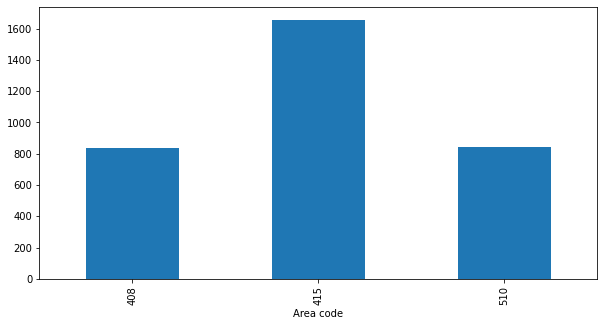

In [ ]:
fig=plt.figure(figsize=(10,5))
df_area=churn_telecom.groupby('Area code')['Churn'].count()
print(df_area)
df_area.plot(kind='bar')

Customer Churn Value is false in Area code

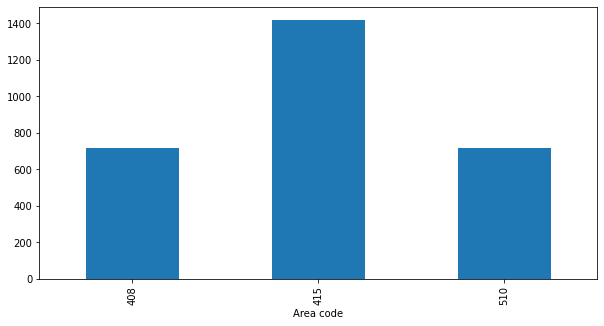

In [ ]:
fig=plt.figure(figsize=(10,5))
df_false=churn_telecom[churn_telecom['Churn']==False].groupby('Area code')['Churn'].count()
df_false
df_false.plot(kind='bar')

Customer Churn Value is True in Area code

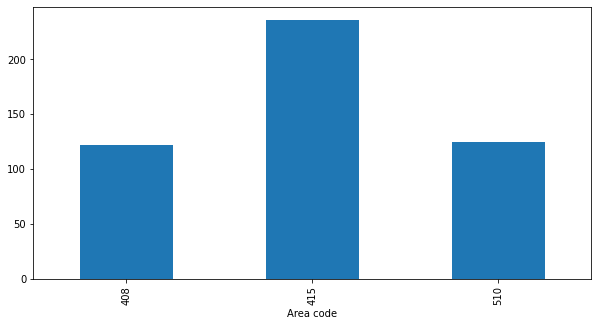

In [ ]:
fig=plt.figure(figsize=(10,5))
df_true=churn_telecom[churn_telecom['Churn']==True].groupby('Area code')['Churn'].count()
df_true
df_true.plot(kind='bar')

In [ ]:
pd.crosstab(churn_telecom_copy['Churn'], churn_telecom_copy['Area code'], margins=True)

Area code,408,415,510,All
Churn,,,,
False,716,1419,715,2850
True,122,236,125,483
All,838,1655,840,3333


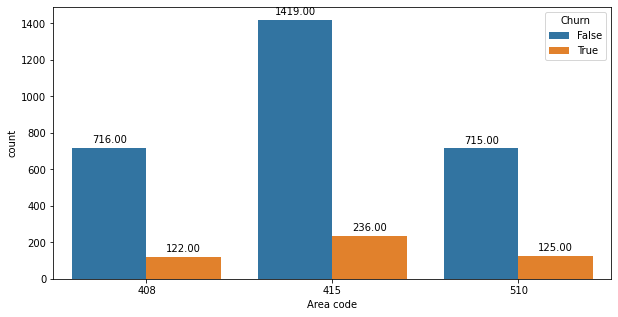

In [ ]:
fig=plt.figure(figsize=(10,5))
plots=sns.countplot(x='Area code', hue='Churn', data=churn_telecom);
for bar in plots.patches: 
    
  # Using Matplotlib's annotate function and 
  # passing the coordinates where the annotation shall be done 
  # x-coordinate: bar.get_x() + bar.get_width() / 2 
  # y-coordinate: bar.get_height() 
  # free space to be left to make graph pleasing: (0, 8) 
  # ha and va stand for the horizontal and vertical alignment 
    plots.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 8), 
                   textcoords='offset points') 

**By the help of all above analysis of Area code wise we can say that the number of Customer belongs to the Churn value True is apporximate 1/6  the number of Customer who belongs to Churn value False**

Identify Neumerical and Categorical variable

In [ ]:
#Exploratory Data Analysis
#For Categorical Variable
churn_cat = churn_telecom_copy.select_dtypes(exclude=["number","float_"])
churn_cat.head()

,State,International plan,Voice mail plan,Churn
0,KS,No,Yes,False
1,OH,No,Yes,False
2,NJ,No,No,False
3,OH,Yes,No,False
4,OK,Yes,No,False


In [ ]:
churn_cat.shape

(3333, 4)

In [ ]:
churn_num=churn_telecom_copy.select_dtypes(exclude=['bool_','object_'])
churn_num.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
churn_num.shape

(3333, 16)

In [ ]:
corr_abs = churn_telecom_copy.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol.head(4)

Total day minutes    Total day charge      1.000000
Total eve minutes    Total eve charge      1.000000
Total night minutes  Total night charge    0.999999
Total intl minutes   Total intl charge     0.999993
dtype: float64

**So by the use of Correlation function we can identify that total charges of cost per minute in day , evening and night calls is 1 (One)**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d6cb04d90>,
      dtype=object)

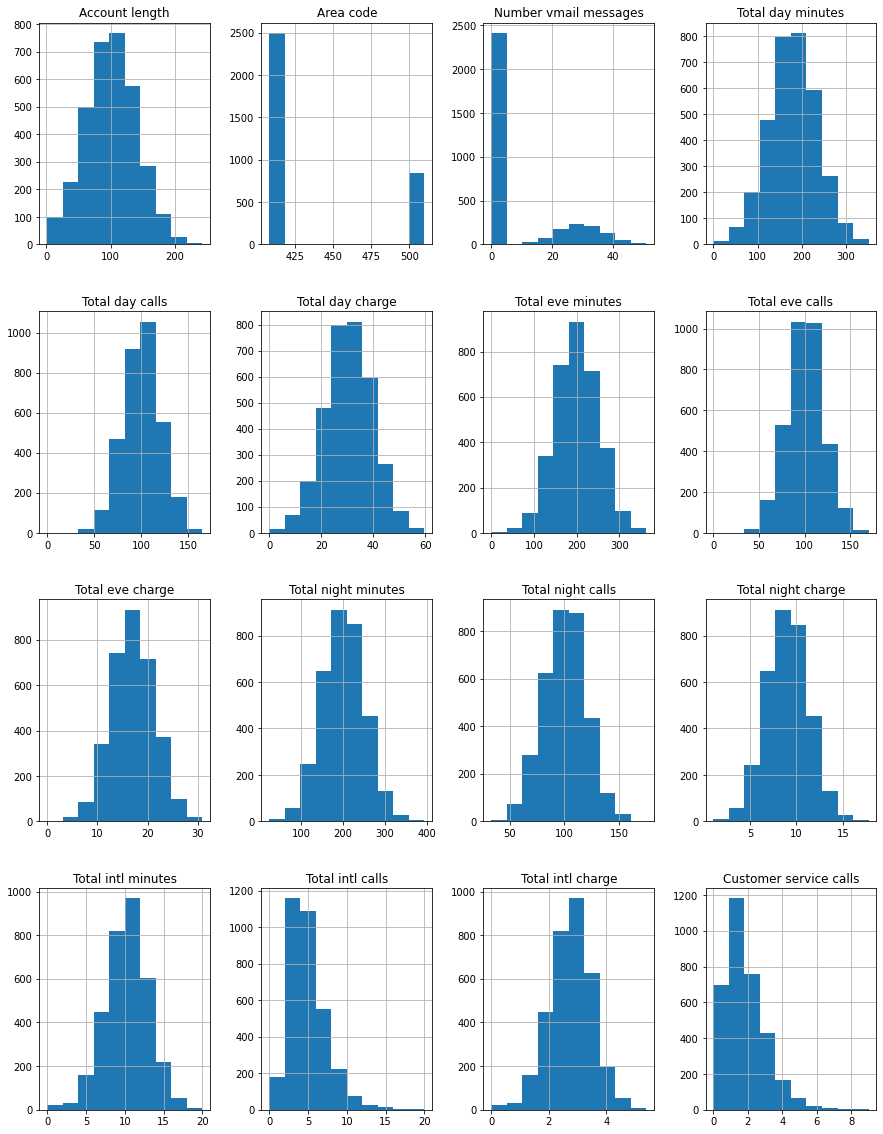

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
churn_num.hist(ax=ax)

**This is separate histogram for the numerical data in the data set.By the help of this we can identify that the Total day charge is correspondence to the total day miuntes, same for the total night charge and total evening charge.**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


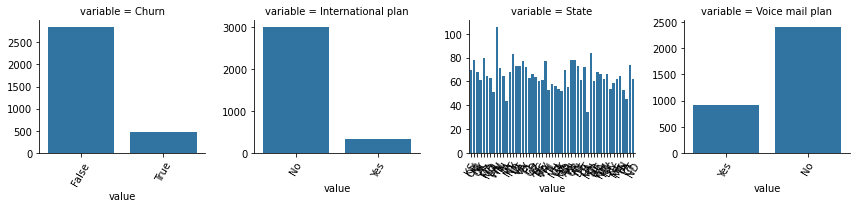

In [ ]:
f = pd.melt(churn_telecom_copy, value_vars=sorted(churn_cat))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

**This is how we can analyse the categorical data of the data set.**

2850 users out of 3333 are loyal; their Churn value is 0. To calculate fractions, pass normalize=True to the value_counts function.



In [ ]:
churn_telecom['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

**I make the new column of 'Total_Charges' in the data set that stores the sum of total day, total eve, total night charges.**

In [ ]:
churn_telecom_copy['Total_Charges']=churn_telecom['Total day charge'] + churn_telecom['Total eve charge'] + churn_telecom['Total night charge']

In [ ]:
churn_telecom_copy.sort_values(by='Total_Charges', ascending=False).head(25)

In [ ]:
pd.crosstab(churn_telecom_copy['Churn'], churn_telecom_copy['Total_Charges'])

Total_Charges,19.98,21.09,23.39,23.93,23.97,24.29,24.81,25.08,25.87,26.62,27.13,27.39,27.51,27.84,28.05,28.86,29.66,29.70,29.73,29.76,30.00,30.10,30.18,30.21,30.25,30.32,30.38,30.67,30.72,30.85,31.08,31.11,31.24,31.26,31.52,31.54,31.56,32.19,32.21,32.33,...,79.98,80.30,80.60,80.63,80.67,80.74,80.99,81.11,81.20,81.46,81.70,81.73,81.75,81.81,81.93,82.00,82.33,82.41,82.58,82.80,83.11,83.28,83.62,83.73,83.96,84.24,84.25,84.68,85.24,85.28,85.29,85.78,85.80,86.84,87.03,87.88,88.31,89.47,90.83,92.56
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,0,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
True,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1


More Cutomer churn whose charges are higher.

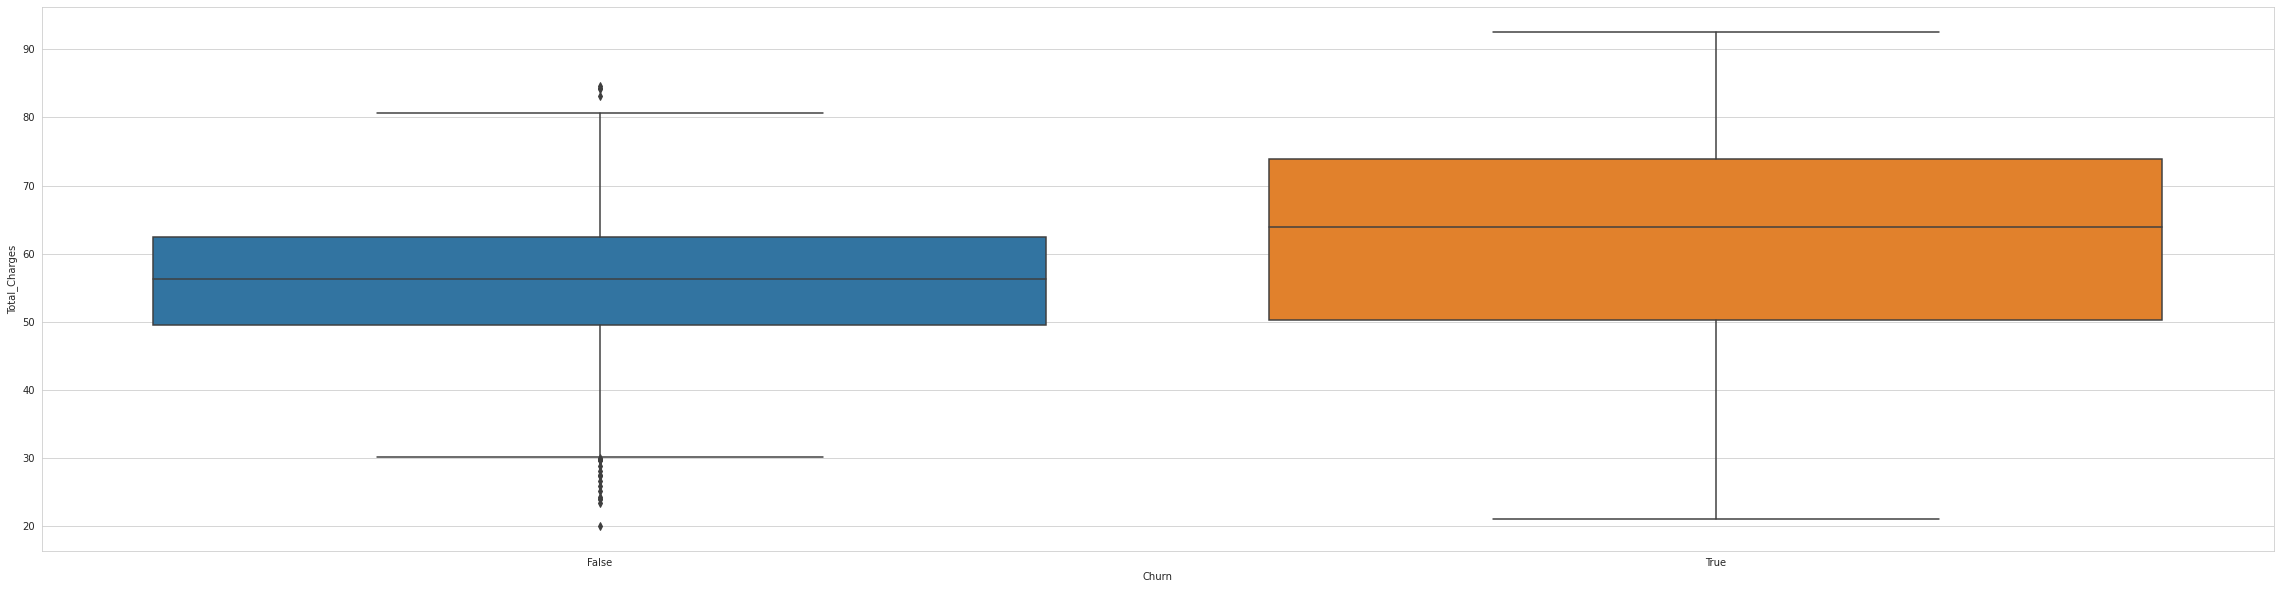

In [ ]:
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x="Churn", y="Total_Charges", data=churn_telecom_copy)

**By the help of this cross table and Box easily analyse that the customer that total charges is higher is more Churn compare to the lesser charger.**

Also used describe method to apply in multiple columns to show that minimum, maximum and average Time sepnd on mobile by the customer who is churned or not churned.

In [ ]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 
                   'Total night minutes']

churn_telecom.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, 
                                            np.max])

Total day minutes                  ... Total night minutes             
                   mean        std amin  ...                 std  amin   amax
Churn                                    ...                                 
False        175.175754  50.181655  0.0  ...           51.105032  23.2  395.0
True         206.914079  68.997792  0.0  ...           47.132825  47.4  354.9

[2 rows x 12 columns]

**International Calls**

Let's see how churn rate is related to the International plan feature. We'll do this using a crosstab contingency table and also through visual analysis with Seaborn (however, visual analysis will be covered more thoroughly in the next article).

In [ ]:
churn_telecom_copy['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
pd.crosstab(churn_telecom_copy['Churn'], churn_telecom_copy['International plan'], margins=True)

International plan,No,Yes,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


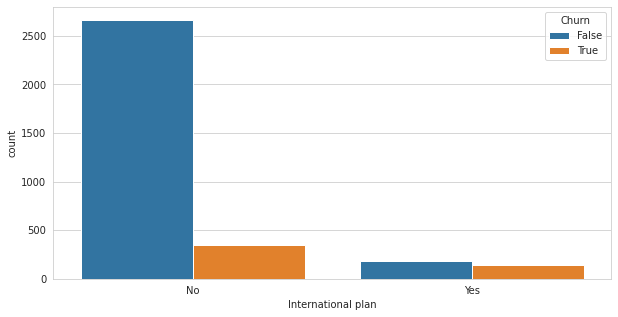

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.countplot(x='International plan', hue='Churn', data=churn_telecom_copy);

**By above analysis can easily identify that the customer who use the international plan there Churn percentage is higher.
187 cutomer use the International plans and 137 in the Churn value True.**

We see that, with International Plan, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls.

Next, let's look at another important feature – **Customer service calls.** Let's also make a summary table and a picture.

In [ ]:
pd.crosstab(churn_telecom['Customer service calls'],churn_telecom['Churn'],margins=True)

Churn,False,True,All
Customer service calls,,,
0,605,92,697
1,1059,122,1181
2,672,87,759
3,385,44,429
4,90,76,166
5,26,40,66
6,8,14,22
7,4,5,9
8,1,1,2


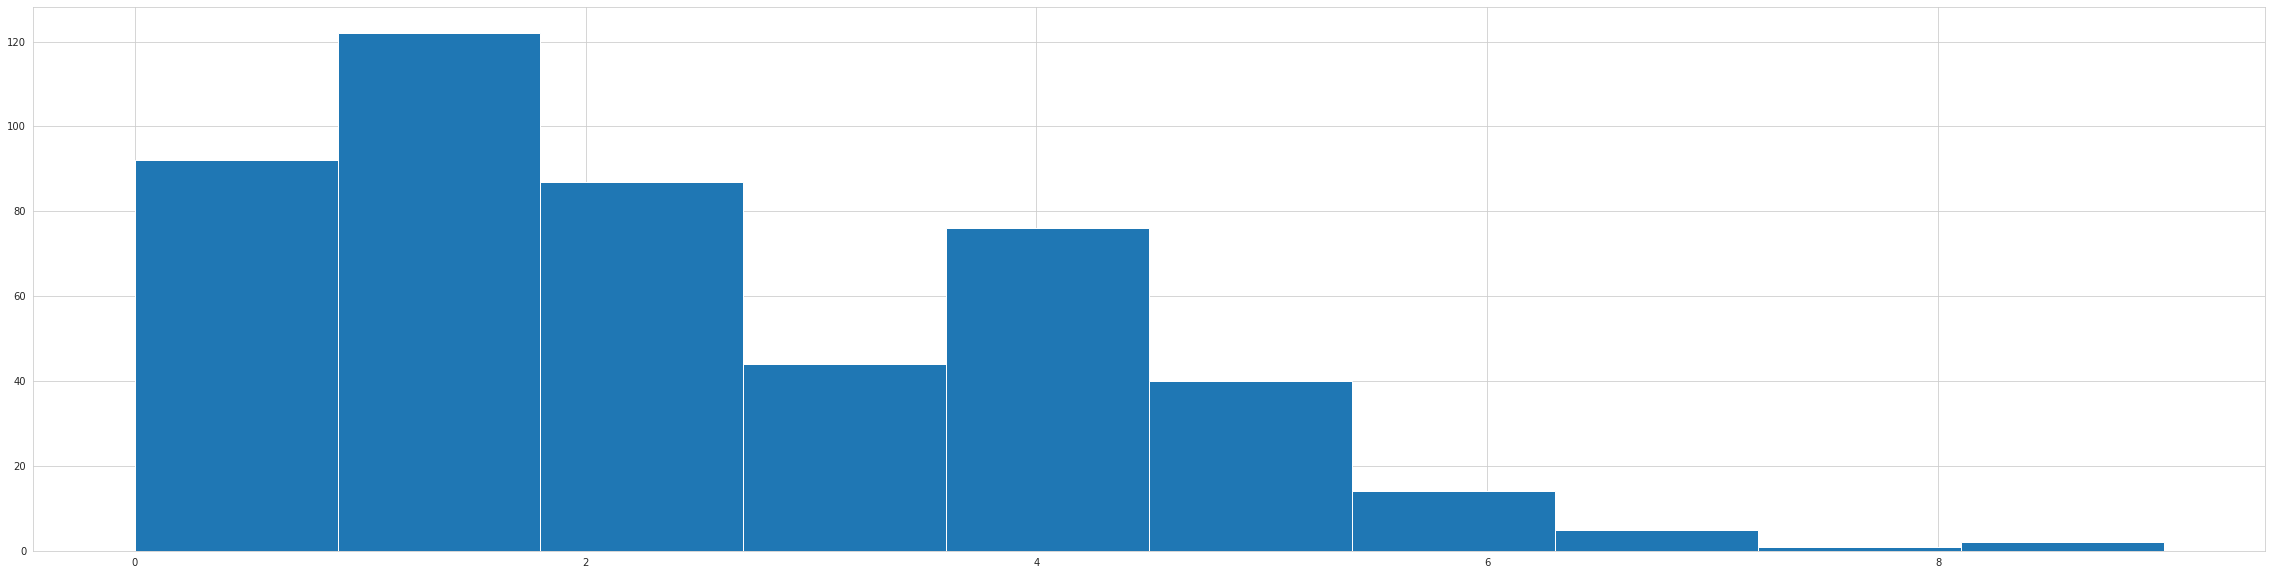

In [ ]:
churn_telecom_csc = churn_telecom[churn_telecom['Churn']== True]['Customer service calls']
churn_telecom_csc.hist()

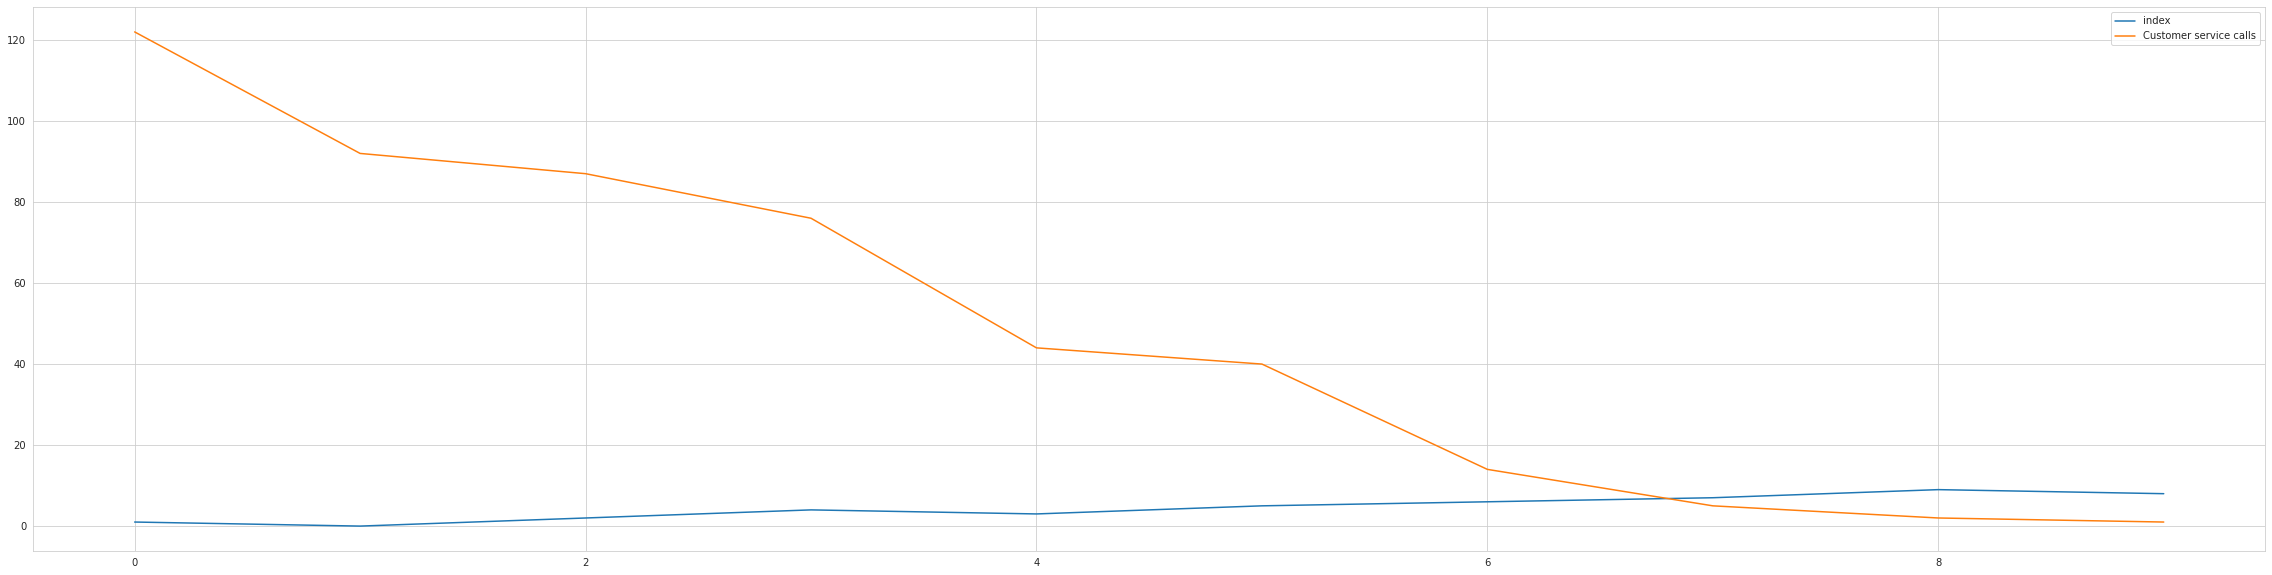

In [ ]:
churn_telecom_csc1 = churn_telecom_csc.value_counts().reset_index()
churn_telecom_csc1.plot()

From the above plot diagram, we can be able to see there is declination in number of customers who are churn out based on number of customer service calls. 

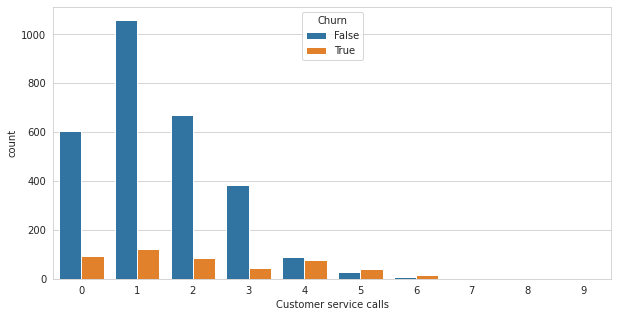

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.countplot(x='Customer service calls', hue='Churn', data=churn_telecom);

 **It's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.
Customer service calls > 3. And once again, let's see how it relates to churn.**

In [ ]:
churn_telecom['Many_service_calls'] = (churn_telecom['Customer service calls'] > 3).astype('int')

pd.crosstab(churn_telecom['Churn'],churn_telecom['Many_service_calls'], margins=True)

Many_service_calls,0,1,All
Churn,,,
False,2721,129,2850
True,345,138,483
All,3066,267,3333


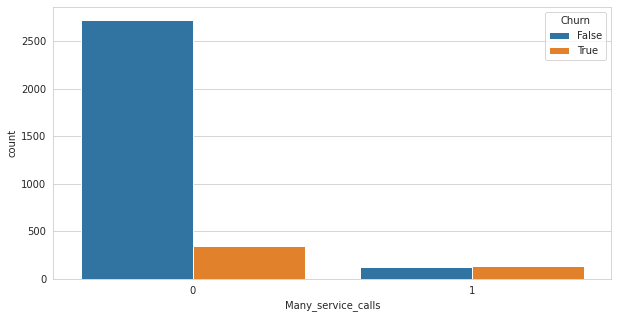

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.countplot(x='Many_service_calls', hue='Churn', data=churn_telecom)

Let's construct another contingency table that relates Churn with both **International plan** and freshly created **Many_service_calls**.

In [ ]:
d = {'No' : False, 'Yes' : True}
churn_telecom['International plan'] = churn_telecom['International plan'].map(d)
churn_telecom.head()

In [ ]:
churn_telecom['International plan'] = churn_telecom['International plan'].astype('int64')

In [ ]:
pd.crosstab(churn_telecom['Churn'],churn_telecom['Many_service_calls'] & churn_telecom['International plan'],margins=True)

col_0,0,1,All
Churn,,,
False,2841,9,2850
True,464,19,483
All,3305,28,3333


**Therefore, predicting that a customer is not loyal (Churn=1) in the case when the number of calls to the Customer service is greater than 3 and the International Plan is added.(and predicting Churn=0 otherwise)**

## <b> Conclusion 

---


We have done necessary findings from the given datasets "Telecom Churn Analysis". The followings are the features/variables which I've concentrated in my analysis. To find the insights from the datasets. 

*   Total Day Minutes
*   Total Evening Minutes
*   Total Night Minutes
*   Total International Minutes
*   Customer Service Calls
*   International Plan
*   State
*   Total Day calls
*   Total Evening calls
*   Total Night calls
*   Total charge









